# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

# GPMP are 150bp. TCGA are 101bp.

In [1]:
tcgadata="TCGA/focused.1000.T.csv.gz"

In [2]:
gpmpdata="GPMP/focused.1000.T.csv.gz"

In [3]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [4]:
threshold=3

In [5]:
import numpy as np
np.__version__

'1.21.0'

In [6]:
import pandas as pd
pd.__version__

'1.2.4'

In [7]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [10]:
import scipy
scipy.__version__

'1.7.0'

In [11]:
from scipy import stats

In [12]:
import seaborn as sns
sns.__version__

'0.11.1'

In [13]:
from datetime import datetime

In [14]:
import sklearn
sklearn.__version__

'0.24.2'

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
default_max_columns=pd.get_option('display.max_columns')

In [17]:
default_max_rows=pd.get_option('display.max_rows')

In [18]:
default_precision=pd.get_option('display.precision')

In [19]:
pd.set_option('display.precision', 2)

In [20]:
#default_threshold=np.get_printoptions()['threshold']

In [21]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [22]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['subject','sequencing','days_to_death','gender1','disease_type','center_name','Unknown'])
mt1['sequencing']=mt1['sequencing'].str[0:20]

In [23]:
mt1.shape

(278, 7)

In [24]:
mt1 #.head()

,subject,sequencing,days_to_death,gender1,disease_type,center_name,Unknown
0,02-2483,02-2483-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2483,02-2483-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,02-2485,02-2485-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,02-2485,02-2485-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,06-0125,06-0125-01A-01D-1490,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...
273,TQ-A7RV,TQ-A7RV-02A-11D-A36O,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
274,TQ-A7RV,TQ-A7RV-10A-01D-A34A,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
275,TQ-A8XE,TQ-A8XE-01A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
276,TQ-A8XE,TQ-A8XE-02A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3


In [25]:
list(mt1)

['subject',
 'sequencing',
 'days_to_death',
 'gender1',
 'disease_type',
 'center_name',
 'Unknown']

# Read Metadata 2

In [26]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [27]:
mt2.shape

(1114, 18)

In [28]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.76,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.73,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.33,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.33,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.16,1.0


In [29]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [30]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [31]:
#mt2[['subject','case_submitter_id']].head()

In [32]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [33]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [34]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')
#meta=mt2.merge(mt1,on='sequencing',suffixes=["_mt2","_mt1"],how='inner')
#meta.drop('subject',axis='columns',inplace=True)
meta

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Age,Survival_months,Vital_status,subject,sequencing,days_to_death,gender1,disease_type,center_name,Unknown
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,63.0,47.57,1.0,06-0125,06-0125-01A-01D-1490,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,TCGA-LGG,"Astrocytoma, NOS",white,hispanic or latino,male,TQ-A7RV-01A-21R-A34F-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A7RV,TQ-A7RV-02A-11D-A36O,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
274,TCGA-LGG,"Astrocytoma, NOS",white,hispanic or latino,male,TQ-A7RV-01A-21R-A34F-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A7RV,TQ-A7RV-10A-01D-A34A,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
275,TCGA-LGG,"Oligodendroglioma, NOS",white,hispanic or latino,female,TQ-A8XE-01A-11R-A36H-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A8XE,TQ-A8XE-01A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
276,TCGA-LGG,"Oligodendroglioma, NOS",white,hispanic or latino,female,TQ-A8XE-01A-11R-A36H-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A8XE,TQ-A8XE-02A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3


In [35]:
del mt1
del mt2

In [36]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Age,Survival_months,Vital_status,subject,sequencing,days_to_death,gender1,disease_type,center_name,Unknown
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,63.0,47.57,1.0,06-0125,06-0125-01A-01D-1490,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


In [37]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [38]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.drop('subject',axis='columns',inplace=True)

In [40]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'sequencing', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'Unknown'],
      dtype='object')

In [41]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     78
Oligodendroglioma, NOS           72
Astrocytoma, anaplastic          48
Mixed glioma                     36
Astrocytoma, NOS                 20
Oligodendroglioma, anaplastic    20
Name: primary_diagnosis, dtype: int64

In [42]:
meta['TERT'].value_counts()

Mutant    146
WT        123
Name: TERT, dtype: int64

In [43]:
meta['IDH'].value_counts()

Mutant    163
WT        108
Name: IDH, dtype: int64

In [44]:
meta['x1p19q'].value_counts()

non-codel    226
codel         48
Name: x1p19q, dtype: int64

In [45]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    196
Glioblastoma Multiforme      78
Name: disease_type, dtype: int64

In [46]:
meta['gender1'].value_counts()

male      154
female    120
Name: gender1, dtype: int64

In [47]:
meta['race'].value_counts()

white                        250
black or african american     15
not reported                   7
asian                          2
Name: race, dtype: int64

In [48]:
meta['ethnicity'].value_counts()

not hispanic or latino    235
not reported               23
hispanic or latino         16
Name: ethnicity, dtype: int64

In [49]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    115
IDH-WT:1p19q-non-codel        108
IDH-Mutant:1p19q-codel         48
IDH-NA:1p19q-non-codel          3
Name: IDH_1p19q_status, dtype: int64

In [50]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             64
oligodendroglioma:IDH-Mutant:1p19q-codel        48
astrocytoma:IDH-Mutant:1p19q-non-codel          37
oligodendroglioma:IDH-Mutant:1p19q-non-codel    29
astrocytoma:IDH-WT:1p19q-non-codel              26
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     26
glioblastoma:IDH-Mutant:1p19q-non-codel         11
oligodendroglioma:IDH-WT:1p19q-non-codel        10
oligoastrocytoma:IDH-WT:1p19q-non-codel          8
Name: WHO_groups, dtype: int64

In [51]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        111
IDH-WT:1p19q-non-codel:TERT-Mutant         95
IDH-Mutant:1p19q-codel:TERT-Mutant         46
IDH-WT:1p19q-non-codel:TERT-WT             10
IDH-NA:1p19q-non-codel:TERT-Mutant          3
IDH-WT:1p19q-non-codel:TERT-NA              3
IDH-Mutant:1p19q-codel:TERT-WT              2
IDH-Mutant:1p19q-non-codel:TERT-NA          2
IDH-Mutant:1p19q-non-codel:TERT-Mutant      2
Name: Triple_group, dtype: int64

In [52]:
meta['MGMT'].value_counts()

Methylated      191
Unmethylated     57
Name: MGMT, dtype: int64

In [53]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    174
Harvard Medical School                100
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

not anymore. I flatten before merging.

In [54]:
#meta.columns=[meta.columns,[''] * len(meta.columns)]

In [55]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'sequencing', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'Unknown'],
      dtype='object')

# Read raw TCGA data and cleanup

In [56]:
tcga_df=pd.read_csv(tcgadata,header=[0,1],index_col=[0,1,2,3])
tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
tcga_df #.head()

chr1 1102000  chr1 1308000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 1409000  chr1 1410000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             1   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 1580000  chr1 1581000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 2211000  chr1 3129000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 3315000  chr1 3321000  ...  \
sample               pup    hkle     mapq                              ...   
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0  ...   
         

In [57]:
tcga_df.reset_index(inplace=True)
tcga_df.rename(columns={"sample": "sequencing"},inplace=True)
tcga_df.head()

,sequencing,pup,hkle,mapq,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,...,chrY 15075000,chrY 15774000,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000
0,02-2483-01A-01D-1494,paired,HERVK113,Q20,0,0,4,1,4,0,...,0,0,0,0,2,0,0,0,0,0
1,02-2483-01A-01D-1494,paired,SVA_A,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02-2483-01A-01D-1494,paired,SVA_B,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,02-2483-01A-01D-1494,paired,SVA_C,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,02-2483-01A-01D-1494,paired,SVA_D,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
tcga_df['sample']=tcga_df['sequencing'].str[0:11]
tcga_df['subject']=tcga_df['sample'].str[0:7]
tcga_df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1024    TQ-A8XE
1025    TQ-A8XE
1026    TQ-A8XE
1027    TQ-A8XE
1028    TQ-A8XE
Name: subject, Length: 1029, dtype: object

In [59]:
tcga_df.columns

Index(['sequencing', 'pup', 'hkle', 'mapq', 'chr1 1102000', 'chr1 1308000',
       'chr1 1409000', 'chr1 1410000', 'chr1 1580000', 'chr1 1581000',
       ...
       'chrY 17181000', 'chrY 19536000', 'chrY 19699000', 'chrY 19700000',
       'chrY 20553000', 'chrY 20976000', 'chrY 21047000', 'chrY 21217000',
       'sample', 'subject'],
      dtype='object', length=12556)

In [60]:
tcga_df=tcga_df[tcga_df['hkle']==hkle]
tcga_df.head()

,sequencing,pup,hkle,mapq,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,...,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000,sample,subject
0,02-2483-01A-01D-1494,paired,HERVK113,Q20,0,0,4,1,4,0,...,0,0,2,0,0,0,0,0,02-2483-01A,02-2483
7,02-2483-10A-01D-1494,paired,HERVK113,Q20,0,0,2,3,3,0,...,0,0,1,1,0,0,0,0,02-2483-10A,02-2483
14,02-2485-01A-01D-1494,paired,HERVK113,Q20,0,0,3,4,4,0,...,0,0,0,1,0,1,0,0,02-2485-01A,02-2485
21,02-2485-10A-01D-1494,paired,HERVK113,Q20,0,0,8,0,0,0,...,0,0,1,0,0,0,0,0,02-2485-10A,02-2485
28,06-0125-01A-01D-1490,paired,HERVK113,Q20,0,0,9,6,9,0,...,0,0,0,0,0,0,0,0,06-0125-01A,06-0125


In [61]:
tcga_df.set_index(['subject','sample','sequencing','pup','hkle','mapq'],inplace=True)
tcga_df.head()

chr1 1102000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 1308000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 1409000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              4   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              2   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              3   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              8   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              9   

                                                               chr1 1410000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              1   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              3   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              4   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              6   

                                                               chr1 1580000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              4   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              3   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              4   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              9   

                                                               chr1 1581000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 2211000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired HERVK113 Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired HERVK113 Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired HERVK113 Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired HERVK113 Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired HERVK113 Q20              0   

                                                               chr1 3129000  \
subject sample      sequencing           pup    hkle     mapq                 
02-2483 02-2483-01A 02-2483

In [62]:
tcga_df.shape

(147, 12550)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [63]:
tcga_df=tcga_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [64]:
tcga_df #.head()

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             1   
        02-2483-10A 02-2483-10A-01D-1494             2             3   
02-2485 02-2485-01A 02-2485-01A-01D-1494             3             4   
        02-2485-10A 02-2485-10A-01D-1494             8             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             6   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             5             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             7             2   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             4             2   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             3             1   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             1   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             0   
        02-2483-10A 02-2483-10A-01D-1494             3             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             4             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             2             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             4             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             4             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             2             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             7             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0         

In [65]:
tcga_df.shape

(147, 12550)

## Drop recurrent tumor (-02?)

## Drop solid normal (-11?) (I've seen a couple)

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [66]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [67]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [68]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [69]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'CS-5390-10A-01D-1468')],
           names=['subject', 'sample', 'sequencing'])

In [70]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [71]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [72]:
#tcga_counts=pd.read_csv("TCGA/TCGA_raw_counts.csv")
tcga_counts=pd.read_csv('TCGA/sequencing_paired_read_counts.csv',header=None,names=['sequencing','count'])
#rc['sample']=rc['sequencing'].str[0:11]
tcga_counts.head()

#tcga_counts.rename(columns={"subject": "sample"},inplace=True)
#tcga_counts.head()

,sequencing,count
0,02-2483-01A-01D-1494,566024474
1,02-2483-10A-01D-1494,579304076
2,02-2485-01A-01D-1494,575060540
3,02-2485-10A-01D-1494,478851061
4,06-0125-01A-01D-1490,1066268796


In [73]:
tcga_df.reset_index(inplace=True)
#tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
#tcga_df=tcga_df.merge(tcga_counts,on='sample')
tcga_df=tcga_df.merge(tcga_counts,on='sequencing')
tcga_df.set_index(['subject','sample','sequencing'],inplace=True)
tcga_df.head()

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             1   
        02-2483-10A 02-2483-10A-01D-1494             2             3   
02-2485 02-2485-01A 02-2485-01A-01D-1494             3             4   
        02-2485-10A 02-2485-10A-01D-1494             8             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             6   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             4             0   
        02-2483-10A 02-2483-10A-01D-1494             3             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             4             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             9             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0             0  ...   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0  ...   
        02-2485-10A 02-2485-10A-01D-1494             0             0  ...   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0  ...   

                                          chrY 15774000  chrY 17181000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              1              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 19536000  chrY 19699000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              2   
        02-2483-10A 02-2483-10A-01D-1494              0              1   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              1   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 19700000  chrY 20553000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              1              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              1              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   


In [74]:
tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]]=(
    1e9*tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]].values)/tcga_df[['count']].values


In [75]:
tcga_df.drop('count',axis='columns',inplace=True)
tcga_df

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494          7.07          1.77   
        02-2483-10A 02-2483-10A-01D-1494          3.45          5.18   
02-2485 02-2485-01A 02-2485-01A-01D-1494          5.22          6.96   
        02-2485-10A 02-2485-10A-01D-1494         16.71          0.00   
06-0125 06-0125-01A 06-0125-01A-01D-1490          8.44          5.63   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W         13.41          0.00   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A         11.17          3.19   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A         11.03          5.52   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O          4.14          1.38   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367          0.00          2.69   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494          7.07           0.0   
        02-2483-10A 02-2483-10A-01D-1494          5.18           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494          6.96           0.0   
        02-2485-10A 02-2485-10A-01D-1494          0.00           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490          8.44           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W          5.36           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A          6.38           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A         11.03           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O          2.76           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367         18.85           0.0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0  ...   
        02-2483-10A 02-2483-10A-01D-1494           0.0         

In [76]:
tcga_df.drop(tcga_df.columns[tcga_df.sum(axis='index')==0],axis='columns',inplace=True)
tcga_df

chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494          7.07          1.77   
        02-2483-10A 02-2483-10A-01D-1494          3.45          5.18   
02-2485 02-2485-01A 02-2485-01A-01D-1494          5.22          6.96   
        02-2485-10A 02-2485-10A-01D-1494         16.71          0.00   
06-0125 06-0125-01A 06-0125-01A-01D-1490          8.44          5.63   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W         13.41          0.00   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A         11.17          3.19   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A         11.03          5.52   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O          4.14          1.38   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367          0.00          2.69   

                                          chr1 1580000  chr1 5573000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494          7.07           0.0   
        02-2483-10A 02-2483-10A-01D-1494          5.18           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494          6.96           0.0   
        02-2485-10A 02-2485-10A-01D-1494          0.00           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490          8.44           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W          5.36           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A          6.38           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A         11.03           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O          2.76           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367         18.85           0.0   

                                          chr1 9002000  chr1 10425000  \
subject sample      sequencing                                          
02-2483 02-2483-01A 02-2483-01A-01D-1494          0.00           1.77   
        02-2483-10A 02-2483-10A-01D-1494          1.73           1.73   
02-2485 02-2485-01A 02-2485-01A-01D-1494          0.00           1.74   
        02-2485-10A 02-2485-10A-01D-1494          0.00           4.18   
06-0125 06-0125-01A 06-0125-01A-01D-1490          0.00           2.81   
...                                                ...            ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W          0.00           0.00   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A          1.60           0.00   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A          0.00           0.00   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O          0.00           0.00   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367          0.00           0.00   

                                          chr1 10427000  chr1 11889000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.00            0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.00            0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.00            0.0   
        02-2485-10A 02-2485-10A-01D-1494           2.09            0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           2.81            0.0   
...                                                 ...            ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           5.36            0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           1.60            0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           2.76            0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           2.76            0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.00            0.0   

                                          chr1 11891000  chr1 12784000  ...  \
subject sample      sequencing                                          ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494           1.77            0.0  ...   
        02-2483-10

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [77]:
n=tcga_df.copy()    # NORMAL
#t=tcga_df.copy()    # TUMOR

In [78]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
#t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [79]:
#n=n.droplevel('sample',axis='index').droplevel('sequencing',axis='index')
#t=t.droplevel('sample',axis='index')

In [80]:
n

,,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11889000,chr1 11891000,chr1 12784000,...,chrY 7180000,chrY 7711000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,3.45,5.18,5.18,0.0,1.73,1.73,0.00,0.0,0.0,0.0,...,3.45,0.0,0.00,3.45,0.00,0.00,1.73,1.73,1.73,0.00
02-2485,02-2485-10A,02-2485-10A-01D-1494,16.71,0.00,0.00,0.0,0.00,4.18,2.09,0.0,0.0,0.0,...,0.00,0.0,0.00,2.09,2.09,10.44,0.00,2.09,0.00,0.00
06-0125,06-0125-10A,06-0125-10A-01D-1490,4.31,1.44,7.19,0.0,1.44,2.88,4.31,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
06-0157,06-0157-10A,06-0157-10A-01D-1491,1.78,0.00,7.12,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
06-0171,06-0171-10A,06-0171-10A-01D-A33C,6.93,2.77,0.00,0.0,0.00,1.39,0.00,0.0,0.0,0.0,...,0.00,0.0,1.39,4.16,1.39,0.00,0.00,0.00,4.16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,3.74,7.49,5.62,0.0,1.87,1.87,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,1.87,0.00,0.00,0.00,1.87,0.00,1.87
TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,17.13,0.00,5.71,0.0,0.00,2.85,5.71,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,13.41,0.00,5.36,0.0,0.00,0.00,5.36,0.0,0.0,0.0,...,2.68,0.0,0.00,0.00,0.00,2.68,2.68,0.00,2.68,0.00


In [81]:
#t.head()

In [82]:
#n_index=n.index
#t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [83]:
#n_index[n_index != t_index]

In [84]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [85]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [86]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [87]:
compdf

,,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11889000,chr1 11891000,chr1 12784000,...,chrY 7180000,chrY 7711000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,1,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
02-2485,02-2485-10A,02-2485-10A-01D-1494,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
06-0125,06-0125-10A,06-0125-10A-01D-1490,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,06-0171-10A,06-0171-10A-01D-A33C,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
compdf.shape

(73, 1571)

### Keep only positions with any sample with something other than 0

In [89]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [90]:
compdf.shape

(73, 849)

In [91]:
compdf.head()

,,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,chr1 15135000,...,chrY 7179000,chrY 7180000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
02-2485,02-2485-10A,02-2485-10A-01D-1494,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
06-0125,06-0125-10A,06-0125-10A-01D-1490,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,06-0171-10A,06-0171-10A-01D-A33C,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Get the chromosome columns for analysis after merging with the metadata

In [92]:
#chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
#chromosome_columns

### Merge with the metadata for later grouping

In [93]:
compdf.reset_index(inplace=True)
compdf

,subject,sample,sequencing,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,...,chrY 7179000,chrY 7180000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
0,02-2483,02-2483-10A,02-2483-10A-01D-1494,1,1,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,02-2485,02-2485-10A,02-2485-10A-01D-1494,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,06-0125,06-0125-10A,06-0125-10A-01D-1490,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06-0171,06-0171-10A,06-0171-10A-01D-A33C,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
69,TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
70,TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
71,TQ-A7RV,TQ-A7RV-10A,TQ-A7RV-10A-01D-A34A,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
compdf['sequencing']

0     02-2483-10A-01D-1494
1     02-2485-10A-01D-1494
2     06-0125-10A-01D-1490
3     06-0157-10A-01D-1491
4     06-0171-10A-01D-A33C
              ...         
68    IK-7675-10A-01D-2086
69    TM-A7CF-10A-01D-A329
70    TQ-A7RK-10A-01D-A33W
71    TQ-A7RV-10A-01D-A34A
72    TQ-A8XE-10A-01D-A367
Name: sequencing, Length: 73, dtype: object

In [95]:
meta['sequencing']

0      02-2483-01A-01D-1494
1      02-2483-10A-01D-1494
2      02-2485-01A-01D-1494
3      02-2485-10A-01D-1494
4      06-0125-01A-01D-1490
               ...         
273    TQ-A7RV-02A-11D-A36O
274    TQ-A7RV-10A-01D-A34A
275    TQ-A8XE-01A-11D-A36O
276    TQ-A8XE-02A-11D-A36O
277    TQ-A8XE-10A-01D-A367
Name: sequencing, Length: 274, dtype: object

In [96]:
#compdf=compdf.merge(meta,on='subject')
compdf=compdf.merge(meta,on='sequencing')
compdf

,subject,sample,sequencing,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,Unknown
0,02-2483,02-2483-10A,02-2483-10A-01D-1494,1,1,1,0,0,0,0,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2485,02-2485-10A,02-2485-10A-01D-1494,1,0,0,0,1,0,0,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,06-0125,06-0125-10A,06-0125-10A-01D-1490,1,0,1,0,0,1,0,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,1,0,0,0,0,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,06-0171,06-0171-10A,06-0171-10A-01D-A33C,1,0,0,0,0,0,0,...,Henry Ford Hospital,NaN,65.0,13.11,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,1,1,1,0,0,0,0,...,Christiana Healthcare,Methylated,43.0,18.99,1.0,578.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
69,TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,1,0,1,0,0,1,0,...,The University of New South Wales,Methylated,41.0,48.36,0.0,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9400/3
70,TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,1,0,1,0,0,1,0,...,University of Sao Paulo,Methylated,NaN,NaN,NaN,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
71,TQ-A7RV,TQ-A7RV-10A,TQ-A7RV-10A-01D-A34A,1,1,1,0,0,0,0,...,University of Sao Paulo,Methylated,NaN,NaN,NaN,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3


In [97]:
compdf.set_index(['subject','sample','sequencing'],inplace=True)
compdf

,,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,chr1 15135000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,Unknown
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,1,1,1,0,0,0,0,0,0,0,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
02-2485,02-2485-10A,02-2485-10A-01D-1494,1,0,0,0,1,0,0,0,0,0,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0125,06-0125-10A,06-0125-10A-01D-1490,1,0,1,0,0,1,0,0,0,0,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,1,0,0,0,0,0,0,0,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0171,06-0171-10A,06-0171-10A-01D-A33C,1,0,0,0,0,0,0,0,0,0,...,Henry Ford Hospital,NaN,65.0,13.11,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,1,1,1,0,0,0,0,0,0,0,...,Christiana Healthcare,Methylated,43.0,18.99,1.0,578.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,1,0,1,0,0,1,0,0,0,0,...,The University of New South Wales,Methylated,41.0,48.36,0.0,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9400/3
TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,1,0,1,0,0,1,0,0,0,0,...,University of Sao Paulo,Methylated,NaN,NaN,NaN,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3


In [98]:
#list(compdf)


In [99]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [100]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:42:53'

### Flatten the multi-level column names

In [101]:
#compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
#compdf #.head()

### Reset Index

In [102]:
compdf.reset_index(inplace=True)
compdf.head(2)

,subject,sample,sequencing,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,Unknown
0,02-2483,02-2483-10A,02-2483-10A-01D-1494,1,1,1,0,0,0,0,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2485,02-2485-10A,02-2485-10A-01D-1494,1,0,0,0,1,0,0,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


In [103]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:42:53'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 10425000' 'chr1 1409000' 'chr1 147733000' 'chr1 155635000'
 'chr1 156179000' 'chr1 156182000' 'chr1 159768000' 'chr1 160690000'
 'chr1 209141000' 'chr1 211222000' 'chr1 227607000' 'chr1 247015000'
 'chr1 45529000' 'chr1 70461000' 'chr1 73129000' 'chr1 73130000'
 'chr1 93276000' 'chr10 102391000' 'chr10 125940000' 'chr10 26893000'
 'chr10 37493000' 'chr10 99256000' 'chr11 18900000' 'chr11 60714000'
 'chr11 62194000' 'chr11 71767000' 'chr12 105479000' 'chr12 110570000'
 'chr12 29933000' 'chr12 32099000' 'chr12 37738000' 'chr12 51455000'
 'chr12 5537000' 'chr12 56400000' 'chr12 93075000' 'chr13 54267000'
 'chr13 90090000' 'chr14 22724000' 'chr15 58834000' 'chr15 75871000'
 'chr15 78222000' 'chr16 35204000' 'chr16 35923000' 'chr16 35956000'
 'chr16 5755000' 'chr16 74799000' 'chr16 75816000' 'chr17 17611000'
 'chr17 54201000' 'chr17 59290000' 'chr17 68604000' 'chr17 7159000'
 'chr18 2000000' 'chr19 11890000' 'chr19 20286000' 'chr19 20

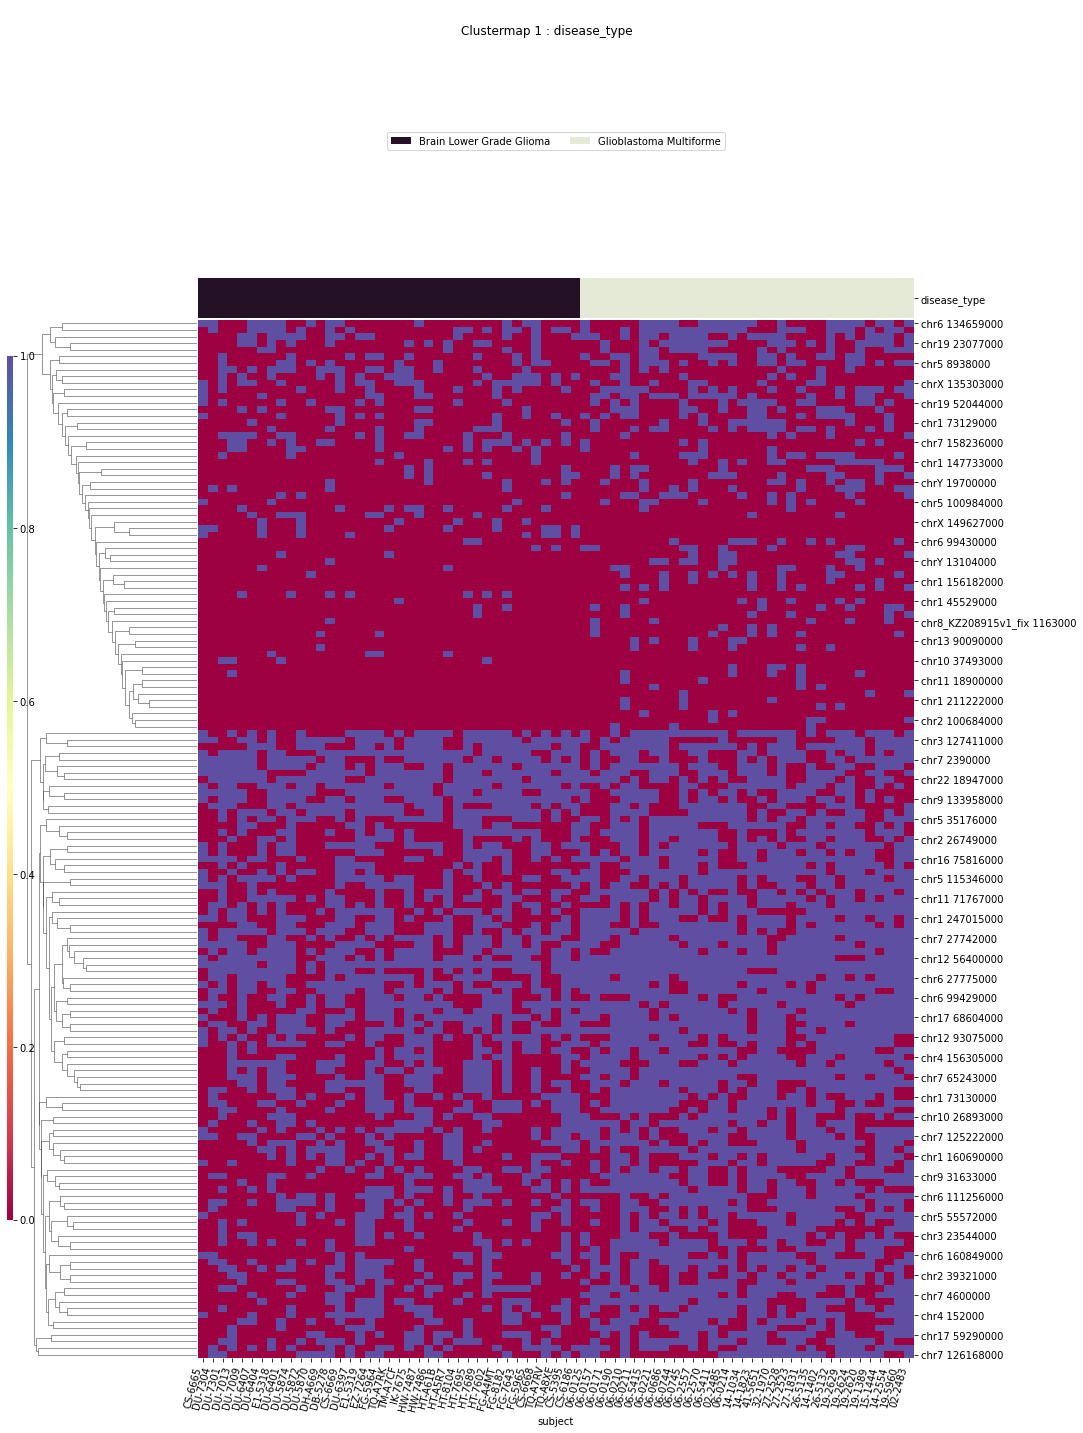

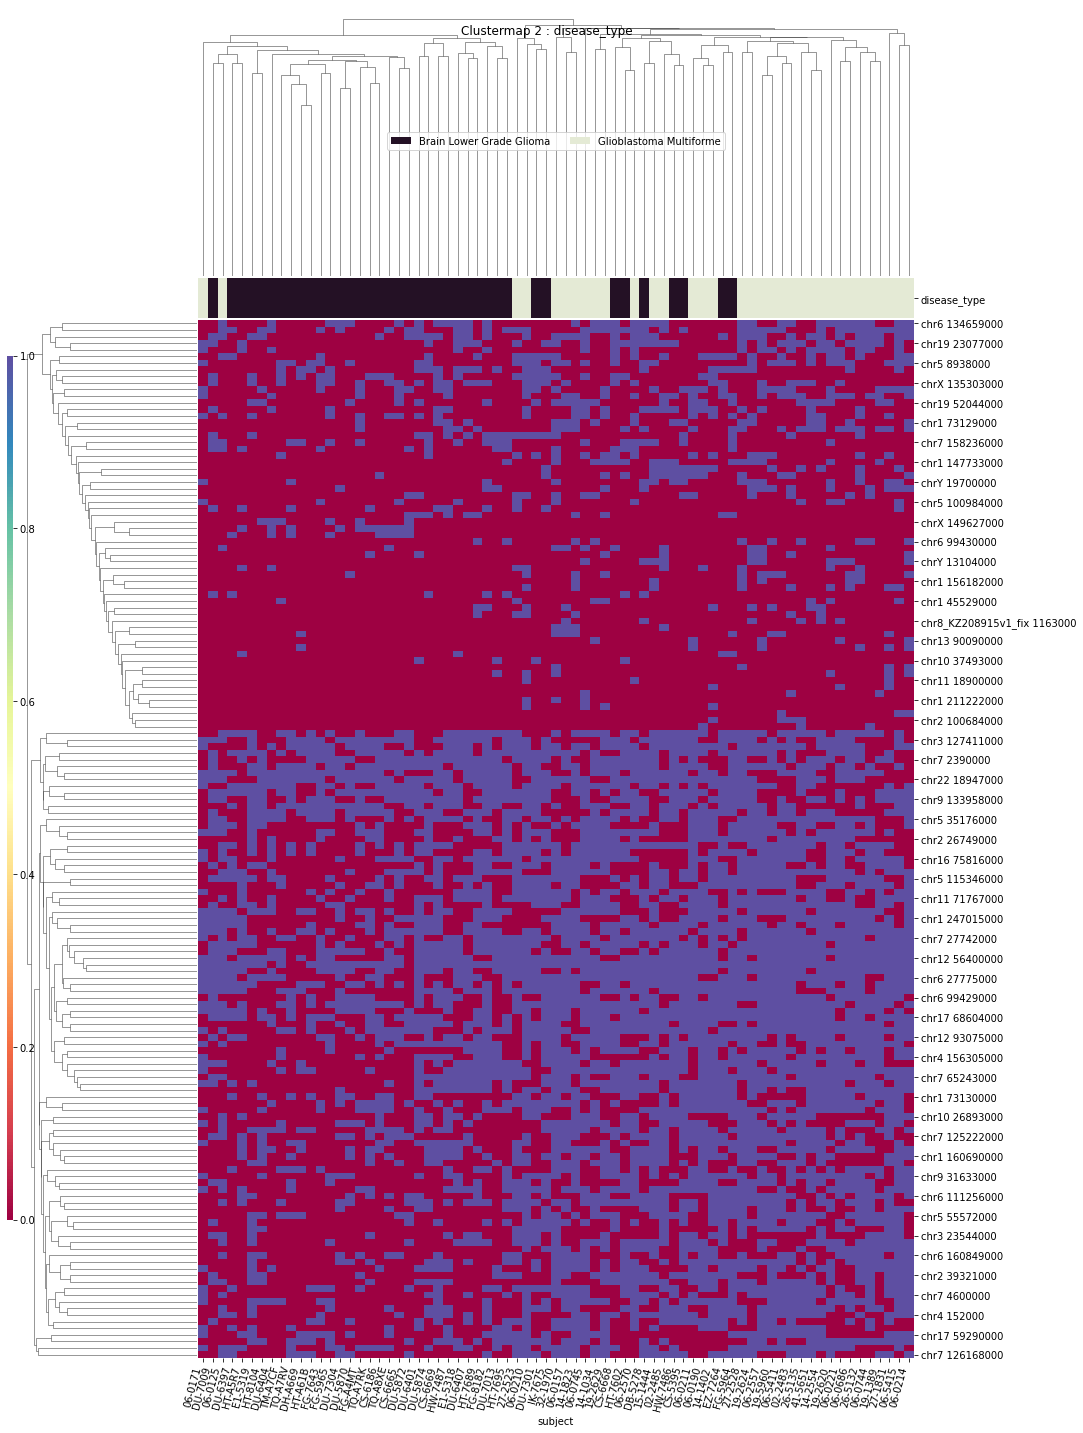

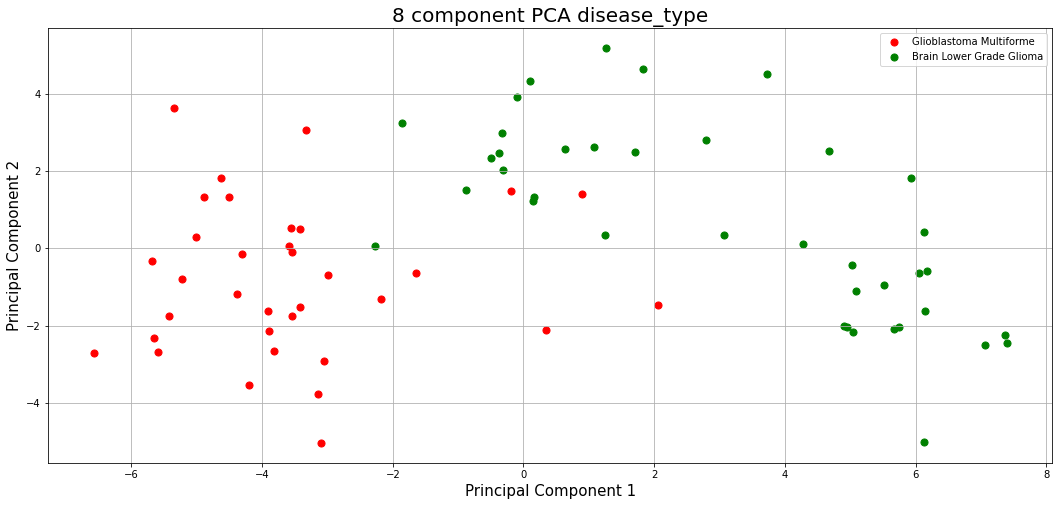

In [104]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [105]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:42:59'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 156182000' 'chr1 209141000' 'chr1 70461000' 'chr1 93276000'
 'chr11 60714000' 'chr12 105479000' 'chr12 51455000' 'chr15 58834000'
 'chr15 78222000' 'chr16 74799000' 'chr16 75816000' 'chr17 54201000'
 'chr18 2000000' 'chr19 37530000' 'chr19 52873000' 'chr2 192542000'
 'chr2 207037000' 'chr2 228364000' 'chr2 32275000' 'chr3 125890000'
 'chr3 189252000' 'chr3 23545000' 'chr3 53977000' 'chr4 135538000'
 'chr4 156305000' 'chr5 30486000' 'chr5 55572000' 'chr6 111256000'
 'chr6 120931000' 'chr6 159795000' 'chr6 160849000' 'chr6 169347000'
 'chr7 125222000' 'chr7 27742000' 'chr7 4600000' 'chr7 65243000'
 'chr8 58672000' 'chr9 134093000' 'chr9 136789000' 'chr9 31632000'
 'chr9 31633000' 'chr9 63682000' 'chr9 73087000' 'chrUn_GL000219v1 176000'
 'chrY 13104000' 'disease_type' 'subject']


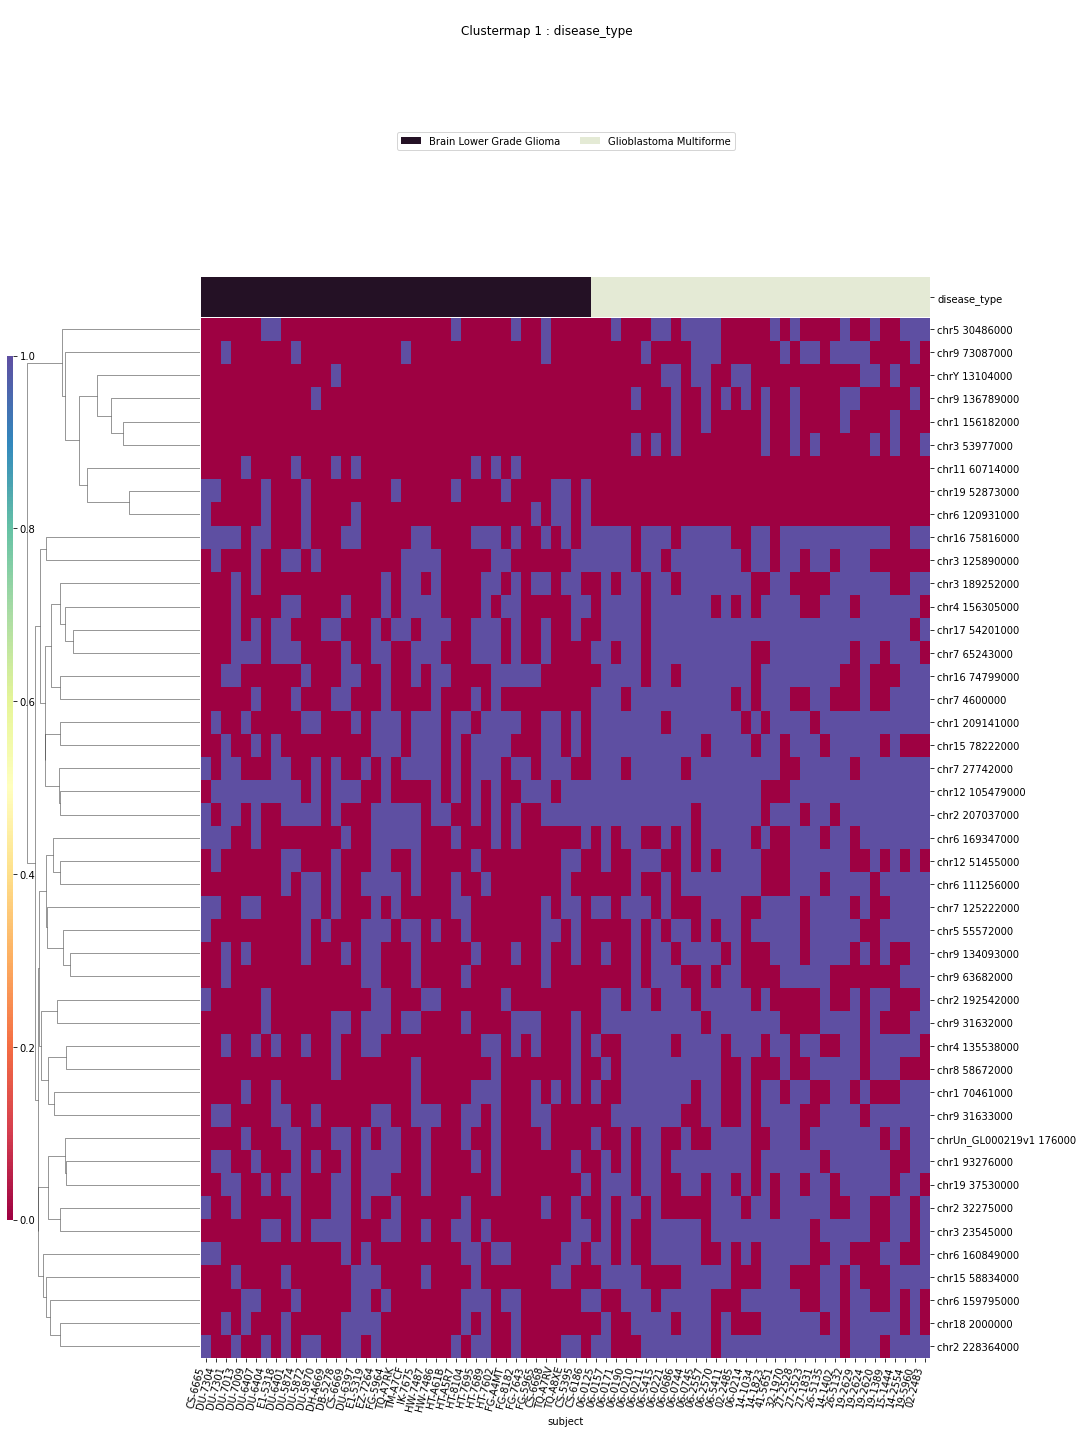

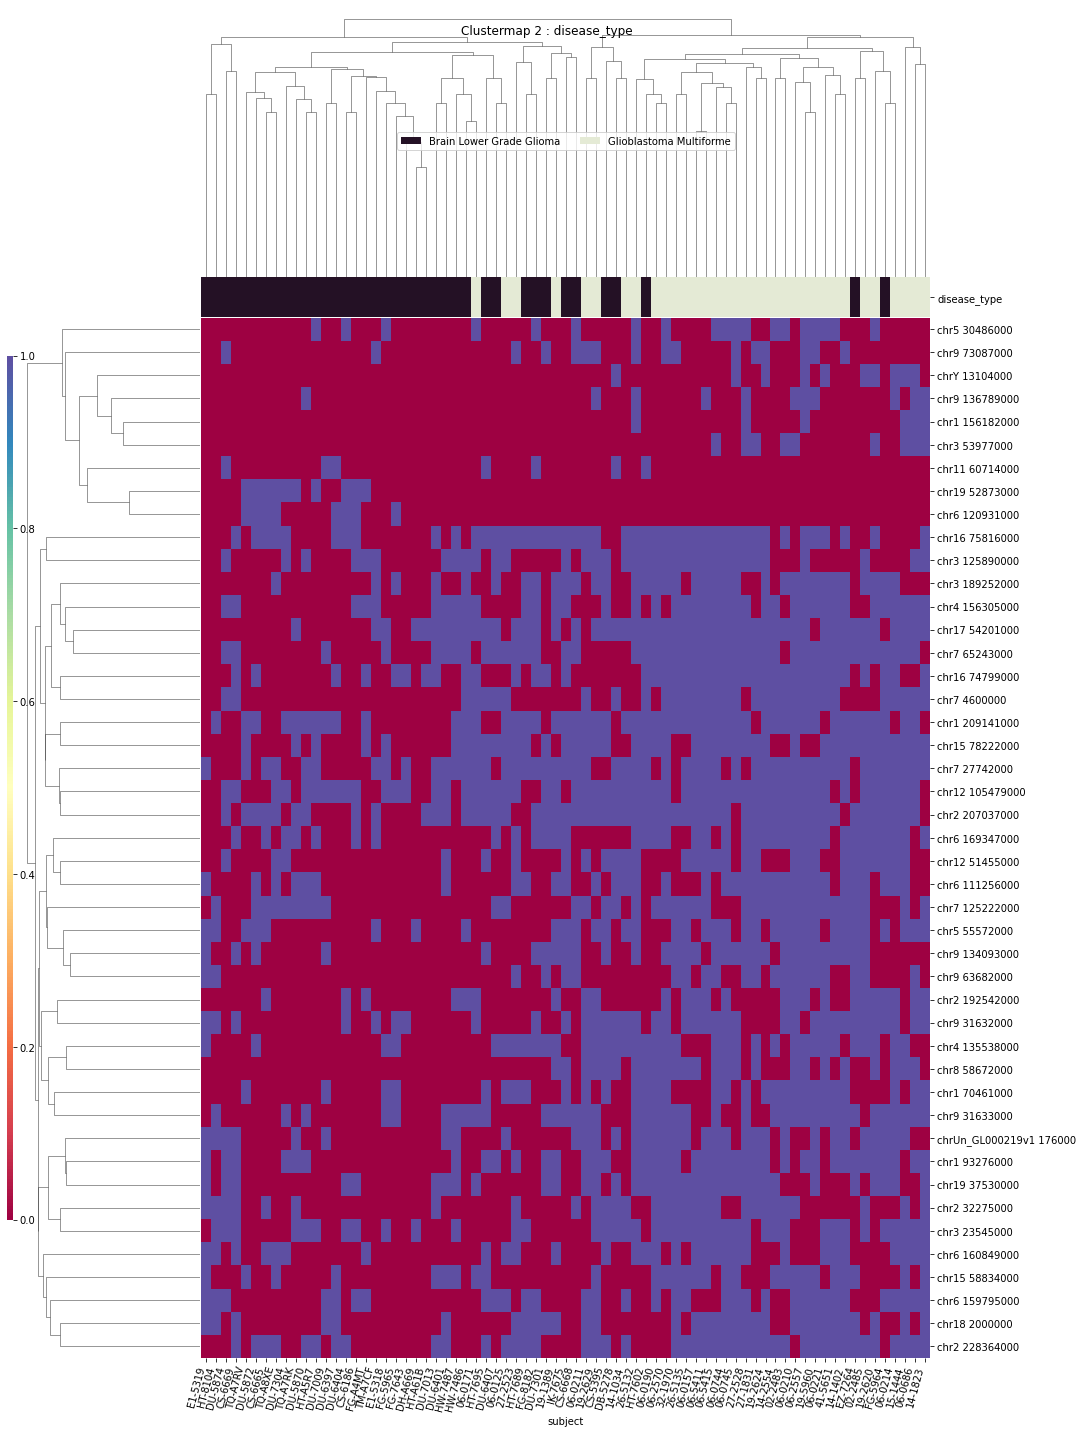

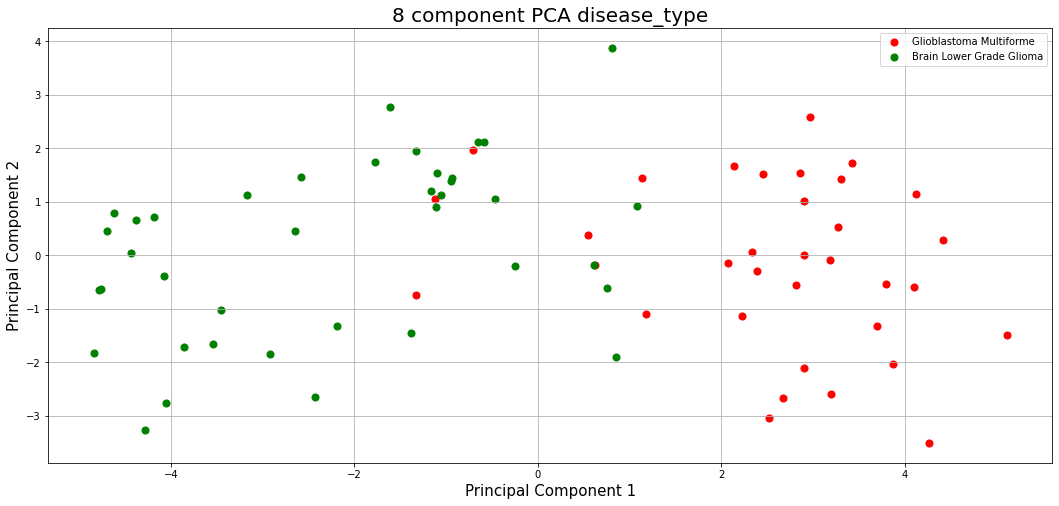

In [106]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [107]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:43:06'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 209141000' 'chr1 70461000' 'chr1 93276000' 'chr17 54201000'
 'chr18 2000000' 'chr2 228364000' 'chr3 53977000' 'chr4 135538000'
 'chr7 4600000' 'chr8 58672000' 'disease_type' 'subject']


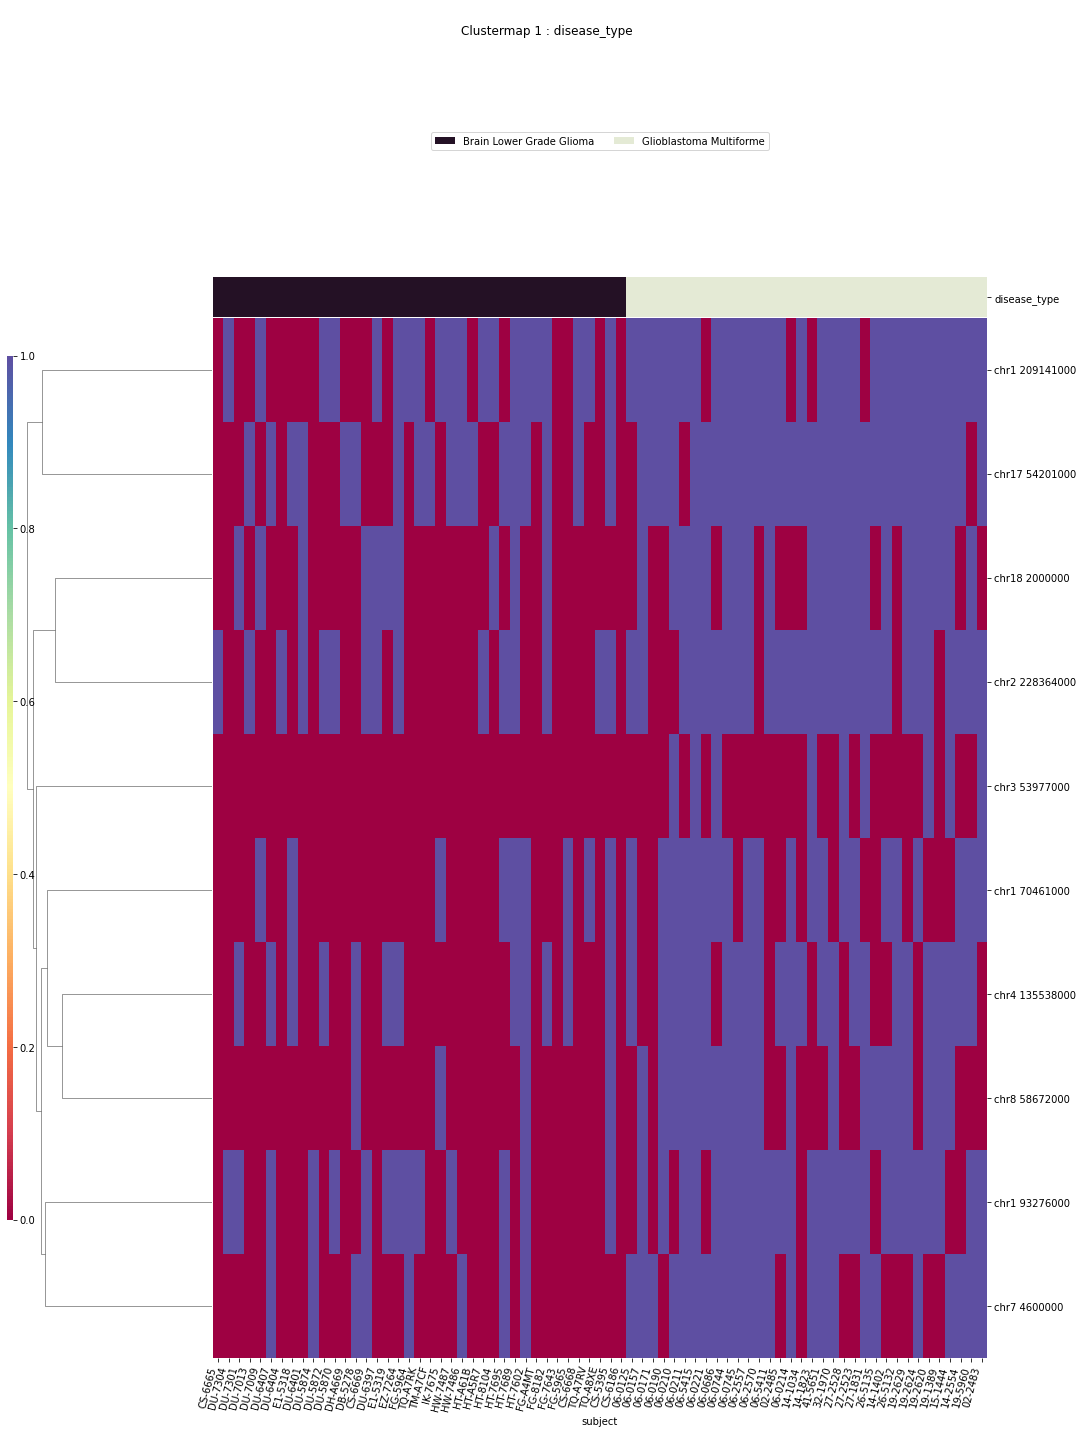

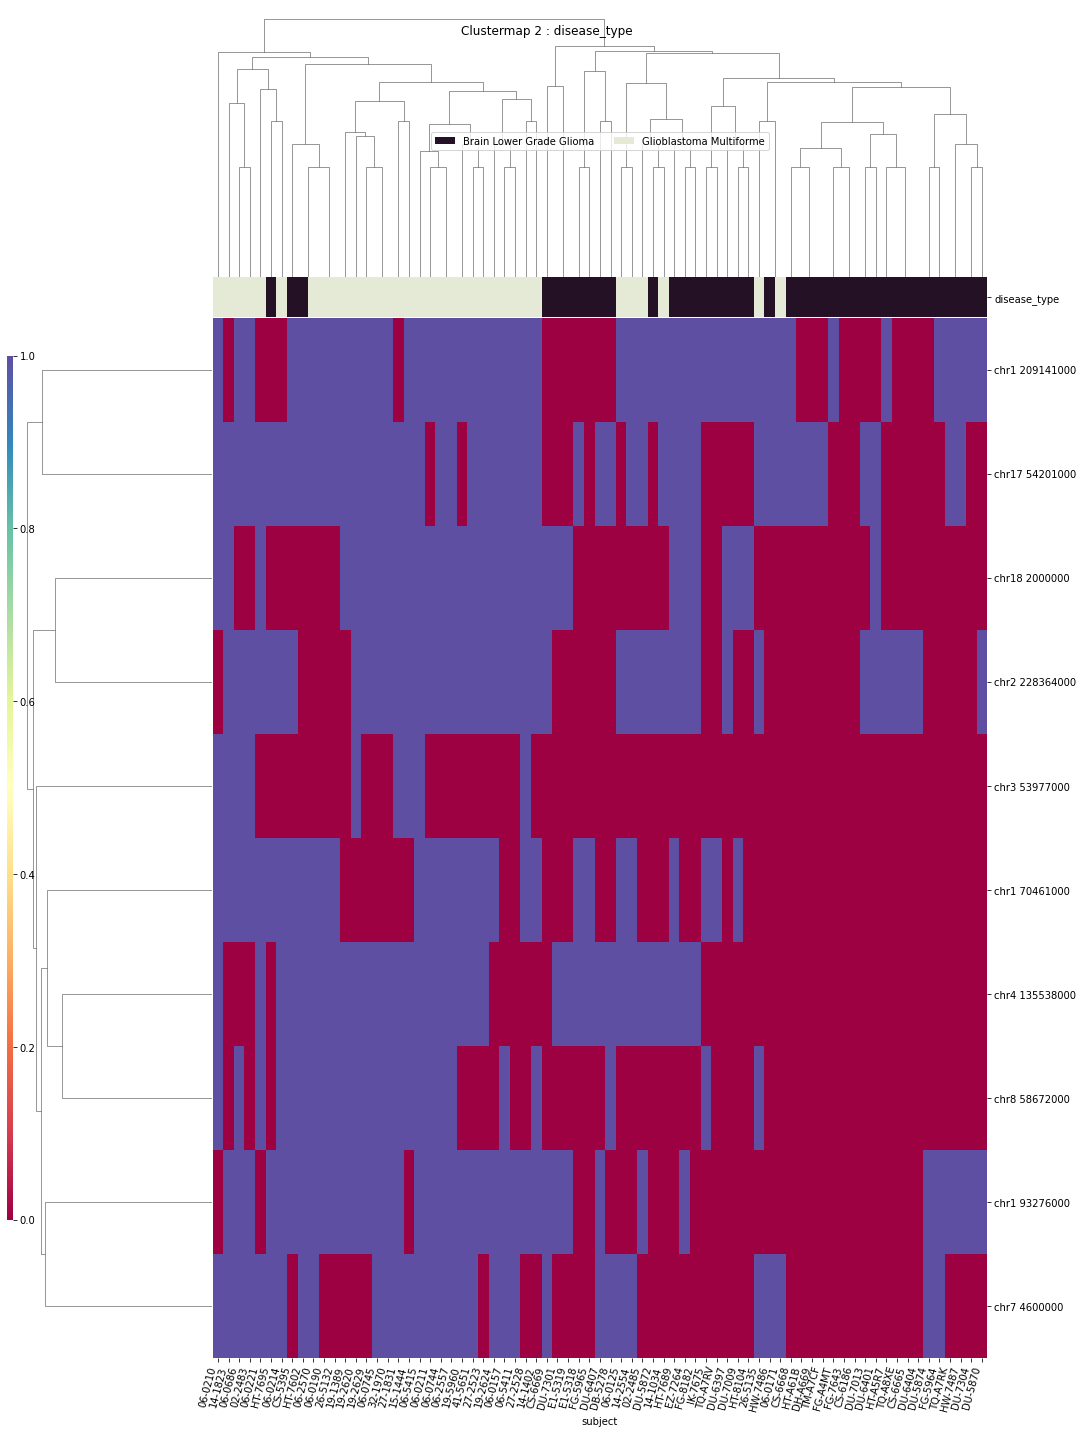

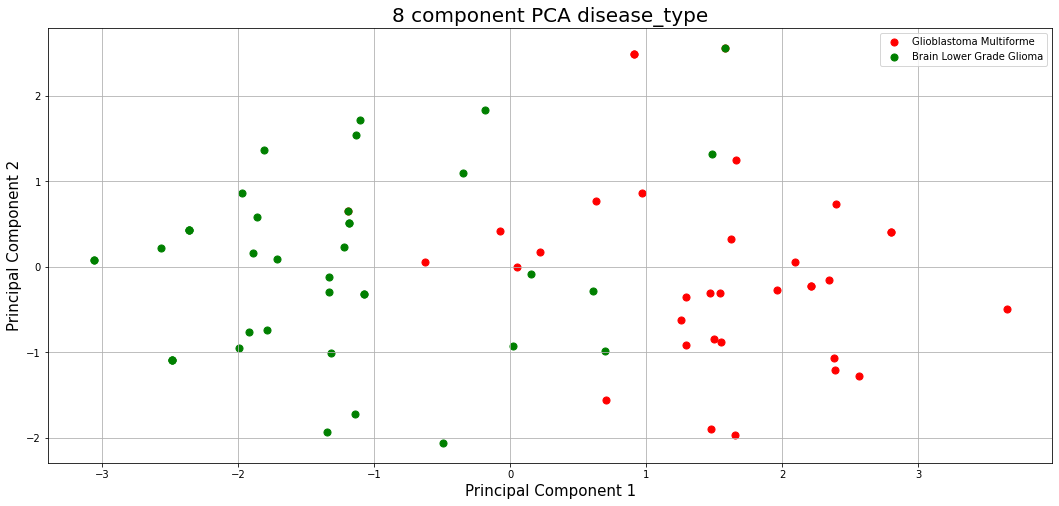

In [108]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:43:12'

# Load the GPMP data

In [110]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df

chromosome                              chr1                                  \
position                             1409000 1410000 1580000 1581000 5573000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        4       3       1       0       0   
                       SVA_A    Q20        0       0       0       0       0   
                       SVA_B    Q20        0       0       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        0       1       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
                       SVA_E    Q20        0       0       0       0       0   
                       SVA_F    Q20        0       0       0       0       0   

chromosome                                                                    \
position                             6304000 6306000 6714000 6716000 7600000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0       0   
                       SVA_A    Q20        3       1       2       2       0   
                       SVA_B    Q20        1       1       2       1       0   
                       SVA_C    Q20        2       1       2       1       0   
                       SVA_D    Q20        2       1       2       1       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        2       0       1       1       2   
                       SVA_C    Q20        3       0       1       1       3   
                       SVA_D    Q20        3       0       1       1       3   
                       SVA_E    Q20        3       0       1       1       3   
                       SVA_F    Q20        3       0       0       0       0   

chromosome                            ...     chrY                             \
position                              ... 12879000 13103000 13104000 15774000   
sample          pup    hkle     mapq  ...                                       
SF12149_S1L1_N  paired HERVK113 Q20   ...        0        0        1        0   
                       SVA_A    Q20   ...        0        0        0        0   
                       SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
...                                   ...      ...      ...      ...      ...   
SF12656_S11L4_N paired SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
                       SVA_E    Q20   ...        0        0        0        0   
                       SVA_F    Q20   ...        0        0        0        0   

chromosome                                                                \
position                             19535000 19536000 19699000 19700000   
sample          pup    hkle     mapq                                       
SF12149_S1L1_N  paired HERVK113 Q20         0        0        2        2   
                       SVA_A    Q20         0        2        0        0   
                       SVA_B    Q20         0        2        0        0   
                       SVA_C    Q20         0        2        0        0   
                       SVA_D    Q20         0        2        0        0   
...            

In [111]:
gpmp_df.reset_index(inplace=True)
gpmp_df

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1409000 1410000 1580000   
0            SF12149_S1L1_N  paired  HERVK113  Q20       4       3       1   
1            SF12149_S1L1_N  paired     SVA_A  Q20       0       0       0   
2            SF12149_S1L1_N  paired     SVA_B  Q20       0       0       0   
3            SF12149_S1L1_N  paired     SVA_C  Q20       0       0       0   
4            SF12149_S1L1_N  paired     SVA_D  Q20       0       0       0   
..                      ...     ...       ...  ...     ...     ...     ...   
93          SF12656_S11L4_N  paired     SVA_B  Q20       0       1       0   
94          SF12656_S11L4_N  paired     SVA_C  Q20       0       0       0   
95          SF12656_S11L4_N  paired     SVA_D  Q20       0       0       0   
96          SF12656_S11L4_N  paired     SVA_E  Q20       0       0       0   
97          SF12656_S11L4_N  paired     SVA_F  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 5573000 6304000  ... 12879000 13103000 13104000 15774000   
0                0       0       0  ...        0        0        1        0   
1                0       0       3  ...        0        0        0        0   
2                0       0       1  ...        0        0        0        0   
3                0       0       2  ...        0        0        0        0   
4                0       0       2  ...        0        0        0        0   
..             ...     ...     ...  ...      ...      ...      ...      ...   
93               0       0       2  ...        0        0        0        0   
94               0       0       3  ...        0        0        0        0   
95               0       0       3  ...        0        0        0        0   
96               0       0       3  ...        0        0        0        0   
97               0       0       3  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
0                 0        0        2        2        0        0  
1                 0        2        0        0        1        0  
2                 0        2        0        0        1        0  
3                 0        2        0        0        1        0  
4                 0        2        0        0        1        0  
..              ...      ...      ...      ...      ...      ...  
93                0        0        0        0        0        0  
94                0        0        0        0        0        0  
95                0        0        0        0        0        0  
96                0        0        0        0        0        0  
97                0        0        0        0        0        0  

[98 rows x 5384 columns]

In [112]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1409000 1410000 1580000   
0            SF12149_S1L1_N  paired  HERVK113  Q20       4       3       1   
7            SF12210_S2L1_N  paired  HERVK113  Q20       4       3       1   
14           SF12255_S7L2_N  paired  HERVK113  Q20       5       1       1   
21           SF12271_S8L2_N  paired  HERVK113  Q20       2       1       1   
28           SF12288_S1L1_N  paired  HERVK113  Q20       7       1       4   
35           SF12333_S2L1_N  paired  HERVK113  Q20       3       3       4   
42           SF12407_S1L1_N  paired  HERVK113  Q20       5       6       4   
49           SF12430_S2L1_N  paired  HERVK113  Q20       1       4       4   
56           SF12460_S8L3_N  paired  HERVK113  Q20       1       3       1   
63           SF12480_S7L3_N  paired  HERVK113  Q20       2       5       3   
70           SF12495_S9L3_N  paired  HERVK113  Q20       2       6       0   
77           SF12577_S6L2_N  paired  HERVK113  Q20       6       3       8   
84          SF12634_S10L4_N  paired  HERVK113  Q20       4       5       6   
91          SF12656_S11L4_N  paired  HERVK113  Q20       0       2       4   

chromosome                          ...     chrY                             \
position   1581000 5573000 6304000  ... 12879000 13103000 13104000 15774000   
0                0       0       0  ...        0        0        1        0   
7                0       0       0  ...        0        0        0        0   
14               0       1       0  ...        0        0        0        0   
21               0       0       0  ...        0        0        2        0   
28               0       1       0  ...        0        0        2        2   
35               0       0       0  ...        0        0        0        0   
42               0       0       0  ...        0        0        0        0   
49               0       0       0  ...        0        0        0        0   
56               0       0       0  ...        0        0        0        0   
63               0       0       0  ...        0        1        1        0   
70               0       0       0  ...        0        1        0        0   
77               0       1       0  ...        0        2        1        0   
84               0       0       0  ...        0        2        2        0   
91               0       0       0  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
0                 0        0        2        2        0        0  
7                 0        0        0        0        0        0  
14                0        0        0        0        0        1  
21                0        0        0        0        0        1  
28                0        0        0        1        0        2  
35                0        0        0        0        0        0  
42                0        0        0        0        0        0  
49                0        0        0        0        0        0  
56                0        0        0        0        0        0  
63                0        0        0        1        0        0  
70                0        0        1        0        0        0  
77                0        0        0        2        0        1  
84                0        0        0        1        0        0  
91                0        0        0        0        0        0  

[14 rows x 5384 columns]

In [113]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

<ipython-input-113-9c38aa8e9611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df['subject']=gpmp_df['sample'].str[0:7]


0     SF12149
7     SF12210
14    SF12255
21    SF12271
28    SF12288
35    SF12333
42    SF12407
49    SF12430
56    SF12460
63    SF12480
70    SF12495
77    SF12577
84    SF12634
91    SF12656
Name: subject, dtype: object

In [114]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df #.head()

chromosome                                      chr1                          \
position                                     1409000 1410000 1580000 1581000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        4       3       1       0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        4       3       1       0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        5       1       1       0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        2       1       1       0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        7       1       4       0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        3       3       4       0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        5       6       4       0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        1       4       4       0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        1       3       1       0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        2       5       3       0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        2       6       0       0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        6       3       8       0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        4       5       6       0   
SF12656 SF12656_S11L4_N paired HERVK113 Q20        0       2       4       0   

chromosome                                                                    \
position                                     5573000 6304000 6306000 6714000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0       0       0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        1       0       0       0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        1       0       0       0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        0       0       0       0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        0       0       0       0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        0       0       0       0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        0       0       0       0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        0       0       0       0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        1       0       0       0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        0       0       0       0   
SF12656 SF12656_S11L4_N paired HERVK113 Q20        0       0       0       0   

chromosome                                                    ...     chrY  \
position                                     6716000 7600000  ... 12879000   
subject sample          pup    hkle     mapq                  ...            
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        0       0  ...        0   
SF12656 SF12656_S11L4_N paired

# Select only the normals

In [115]:
gpmp_df = gpmp_df.loc[
    gpmp_df.loc[gpmp_df.index.get_level_values('sample').str.contains("N$")].index]


In [116]:
gpmp_df

chromosome                                      chr1                          \
position                                     1409000 1410000 1580000 1581000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        4       3       1       0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        4       3       1       0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        5       1       1       0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        2       1       1       0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        7       1       4       0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        3       3       4       0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        5       6       4       0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        1       4       4       0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        1       3       1       0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        2       5       3       0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        2       6       0       0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        6       3       8       0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        4       5       6       0   
SF12656 SF12656_S11L4_N paired HERVK113 Q20        0       2       4       0   

chromosome                                                                    \
position                                     5573000 6304000 6306000 6714000   
subject sample          pup    hkle     mapq                                   
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0       0       0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        1       0       0       0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        1       0       0       0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        0       0       0       0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        0       0       0       0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        0       0       0       0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        0       0       0       0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        0       0       0       0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        1       0       0       0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        0       0       0       0   
SF12656 SF12656_S11L4_N paired HERVK113 Q20        0       0       0       0   

chromosome                                                    ...     chrY  \
position                                     6716000 7600000  ... 12879000   
subject sample          pup    hkle     mapq                  ...            
SF12149 SF12149_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12210 SF12210_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12255 SF12255_S7L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12271 SF12271_S8L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12288 SF12288_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12333 SF12333_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12407 SF12407_S1L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12430 SF12430_S2L1_N  paired HERVK113 Q20        0       0  ...        0   
SF12460 SF12460_S8L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12480 SF12480_S7L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12495 SF12495_S9L3_N  paired HERVK113 Q20        0       0  ...        0   
SF12577 SF12577_S6L2_N  paired HERVK113 Q20        0       0  ...        0   
SF12634 SF12634_S10L4_N paired HERVK113 Q20        0       0  ...        0   
SF12656 SF12656_S11L4_N paired

In [117]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')
gpmp_df

chromosome                 chr1                                          \
position                1409000 1410000 1580000 1581000 5573000 6304000   
subject sample                                                            
SF12149 SF12149_S1L1_N        4       3       1       0       0       0   
SF12210 SF12210_S2L1_N        4       3       1       0       0       0   
SF12255 SF12255_S7L2_N        5       1       1       0       1       0   
SF12271 SF12271_S8L2_N        2       1       1       0       0       0   
SF12288 SF12288_S1L1_N        7       1       4       0       1       0   
SF12333 SF12333_S2L1_N        3       3       4       0       0       0   
SF12407 SF12407_S1L1_N        5       6       4       0       0       0   
SF12430 SF12430_S2L1_N        1       4       4       0       0       0   
SF12460 SF12460_S8L3_N        1       3       1       0       0       0   
SF12480 SF12480_S7L3_N        2       5       3       0       0       0   
SF12495 SF12495_S9L3_N        2       6       0       0       0       0   
SF12577 SF12577_S6L2_N        6       3       8       0       1       0   
SF12634 SF12634_S10L4_N       4       5       6       0       0       0   
SF12656 SF12656_S11L4_N       0       2       4       0       0       0   

chromosome                                               ...     chrY  \
position                6306000 6714000 6716000 7600000  ... 12879000   
subject sample                                           ...            
SF12149 SF12149_S1L1_N        0       0       0       0  ...        0   
SF12210 SF12210_S2L1_N        0       0       0       0  ...        0   
SF12255 SF12255_S7L2_N        0       0       0       0  ...        0   
SF12271 SF12271_S8L2_N        0       0       0       0  ...        0   
SF12288 SF12288_S1L1_N        0       0       0       0  ...        0   
SF12333 SF12333_S2L1_N        0       0       0       0  ...        0   
SF12407 SF12407_S1L1_N        0       0       0       0  ...        0   
SF12430 SF12430_S2L1_N        0       0       0       0  ...        0   
SF12460 SF12460_S8L3_N        0       0       0       0  ...        0   
SF12480 SF12480_S7L3_N        0       0       0       0  ...        0   
SF12495 SF12495_S9L3_N        0       0       0       0  ...        0   
SF12577 SF12577_S6L2_N        0       0       0       0  ...        0   
SF12634 SF12634_S10L4_N       0       0       0       0  ...        0   
SF12656 SF12656_S11L4_N       0       0       0       0  ...        0   

chromosome                                                                     \
position                13103000 13104000 15774000 19535000 19536000 19699000   
subject sample                                                                  
SF12149 SF12149_S1L1_N         0        1        0        0        0        2   
SF12210 SF12210_S2L1_N         0        0        0        0        0        0   
SF12255 SF12255_S7L2_N         0        0        0        0        0        0   
SF12271 SF12271_S8L2_N         0        2        0        0        0        0   
SF12288 SF12288_S1L1_N         0        2        2        0        0        0   
SF12333 SF12333_S2L1_N         0        0        0        0        0        0   
SF12407 SF12407_S1L1_N         0        0        0        0        0        0   
SF12430 SF12430_S2L1_N         0        0        0        0        0        0   
SF12460 SF12460_S8L3_N         0        0        0        0        0        0   
SF12480 SF12480_S7L3_N         1        1        0        0        0        0   
SF12495 SF12495_S9L3_N         1        0        0        0        0        1   
SF12577 SF12577_S6L2_N         2        1        0        0        0        0   
SF12634 SF12634_S10L4_N        2        2        0        0        0        0   
SF12656 SF12656_S11L4_N        0        0        0        0        0        0   

chromosome                                          
position                19700000 20553000 20976000 

In [118]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,chr1 7600000,...,chrY 12879000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000
subject,sample,,,,,,,,,,,,,,,,,,,,,
SF12149,SF12149_S1L1_N,4,3,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,2,0,0
SF12210,SF12210_S2L1_N,4,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12255,SF12255_S7L2_N,5,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
SF12271,SF12271_S8L2_N,2,1,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
SF12288,SF12288_S1L1_N,7,1,4,0,1,0,0,0,0,0,...,0,0,2,2,0,0,0,1,0,2
SF12333,SF12333_S2L1_N,3,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12407,SF12407_S1L1_N,5,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12430,SF12430_S2L1_N,1,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12460,SF12460_S8L3_N,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [119]:
gpmp_counts=pd.read_csv("GPMP/raw_read_counts.csv")
gpmp_counts.head()

,sample,raw pair count
0,SF12149_S1L0_E,1515318278
1,SF12149_S1L1_N,660620929
2,SF12149_S2L0_NE,1334986480
3,SF12210_S2L1_N,597544666
4,SF12210_S3L1_E,1487133148


In [120]:
gpmp_df.reset_index(inplace=True)
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,chr1 7600000,...,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,raw pair count
subject,sample,,,,,,,,,,,,,,,,,,,,,
SF12149,SF12149_S1L1_N,4,3,1,0,0,0,0,0,0,0,...,0,1,0,0,0,2,2,0,0,660620929
SF12210,SF12210_S2L1_N,4,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,597544666
SF12255,SF12255_S7L2_N,5,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,688035696
SF12271,SF12271_S8L2_N,2,1,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,751091228
SF12288,SF12288_S1L1_N,7,1,4,0,1,0,0,0,0,0,...,0,2,2,0,0,0,1,0,2,1101793738
SF12333,SF12333_S2L1_N,3,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1195944225
SF12407,SF12407_S1L1_N,5,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1176493990
SF12430,SF12430_S2L1_N,1,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1267959047
SF12460,SF12460_S8L3_N,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,960343467


In [121]:
gpmp_df=gpmp_df.droplevel('sample',axis='index')
gpmp_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,chr1 7600000,...,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,raw pair count
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,4,3,1,0,0,0,0,0,0,0,...,0,1,0,0,0,2,2,0,0,660620929
SF12210,4,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,597544666
SF12255,5,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,688035696
SF12271,2,1,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,751091228
SF12288,7,1,4,0,1,0,0,0,0,0,...,0,2,2,0,0,0,1,0,2,1101793738
SF12333,3,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1195944225
SF12407,5,6,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1176493990
SF12430,1,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1267959047
SF12460,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,960343467


In [122]:
gpmp_df.shape

(14, 5381)

In [123]:
gpmp_df=gpmp_df.loc[:, (gpmp_df != 0).any(axis=0)]

In [124]:
gpmp_df.shape

(14, 1213)

In [125]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


<ipython-input-125-5f77c92ad960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [126]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,...,chrY 7180000,chrY 7711000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,6.05,4.54,1.51,0.00,1.51,0.00,3.03,4.54,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.51,0.00,3.03,3.03,0.00
SF12210,6.69,5.02,1.67,0.00,0.00,1.67,1.67,1.67,1.67,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12255,7.27,1.45,1.45,1.45,0.00,0.00,4.36,0.00,0.00,0.00,...,0.00,0.00,1.45,0.00,0.00,0.00,0.00,0.00,0.00,1.45
SF12271,2.66,1.33,1.33,0.00,1.33,2.66,0.00,0.00,0.00,0.00,...,1.33,0.00,0.00,1.33,0.00,2.66,0.00,0.00,0.00,1.33
SF12288,6.35,0.91,3.63,0.91,0.91,3.63,1.82,0.91,0.00,0.00,...,0.91,0.00,0.00,1.82,0.00,1.82,1.82,0.00,0.91,1.82
SF12333,2.51,2.51,3.34,0.00,0.00,2.51,1.67,0.00,0.84,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12407,4.25,5.10,3.40,0.00,0.00,0.85,4.25,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12430,0.79,3.15,3.15,0.00,0.00,0.79,4.73,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12460,1.04,3.12,1.04,0.00,0.00,0.00,4.17,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [127]:
gpmp_binary_df=(gpmp_df>=threshold).replace([False,True],[0,1]).copy()
gpmp_binary_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,...,chrY 7180000,chrY 7711000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
SF12210,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12255,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12288,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12333,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12407,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12430,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12460,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
gpmp_binary_df.shape

(14, 1212)

In [129]:
gpmp_binary_df=gpmp_binary_df.loc[:, (gpmp_binary_df != 0).any(axis=0)]
gpmp_binary_df.shape

(14, 553)

In [130]:
gpmp_binary_df.loc[:,'disease_type']='GBM'
gpmp_binary_df

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,chr1 1409000,chr1 1410000,chr1 1580000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 15135000,chr1 15136000,chr1 15379000,chr1 25587000,...,chrX 145720000,chrX 149627000,chrX 152129000,chrX 152130000,chrX 154909000,chrY 6749000,chrY 7179000,chrY 19699000,chrY 19700000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,1,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,1,GBM
SF12210,1,1,0,0,0,0,0,1,1,0,...,1,1,0,1,0,0,0,0,0,GBM
SF12255,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,GBM
SF12271,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,GBM
SF12288,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,GBM
SF12333,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GBM
SF12407,1,1,1,0,1,0,0,1,1,1,...,0,0,1,1,0,0,0,0,0,GBM
SF12430,0,1,1,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,GBM
SF12460,0,1,0,0,1,0,0,0,1,1,...,0,0,1,1,1,0,0,0,0,GBM


In [131]:
gpmp_binary_df.shape

(14, 554)

In [132]:
both_binary_df=compdf.copy()

In [133]:
both_binary_df.drop(['Triple_group', 'Tissue_sample_location', 'MGMT', 'Age', 'Survival_months',
                     'Vital_status', 'days_to_death', 'gender1','center_name',
                     'race', 'ethnicity', 'gender2', 'RE_names', 'IDH', 'x1p19q', 'TERT',
                     'IDH_1p19q_status', 'WHO_groups',
                     'project_id','primary_diagnosis','sample','sequencing','Unknown'], axis='columns',inplace=True)

In [134]:
both_binary_df.set_index(['subject'],inplace=True)
both_binary_df #.head()

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,chr1 15135000,...,chrY 7180000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,Glioblastoma Multiforme
02-2485,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Glioblastoma Multiforme
06-0125,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0171,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Glioblastoma Multiforme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TM-A7CF,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TQ-A7RK,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma


In [135]:
both_binary_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,chr1 15135000,...,chrY 7180000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,Glioblastoma Multiforme
02-2485,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Glioblastoma Multiforme
06-0125,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
06-0171,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Glioblastoma Multiforme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TM-A7CF,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma
TQ-A7RK,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brain Lower Grade Glioma


In [136]:
both_binary_df=both_binary_df.append(gpmp_binary_df)
both_binary_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,chr1 15135000,...,chr12_KZ559112v1_alt 111000,chr13 34541000,chr14 20268000,chr19 41037000,chr6 16004000,chr6 160082000,chr7 105149000,chr7 147801000,chr7 158657000,chrX 154909000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,1,1,1,0.0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-2485,1,0,0,0.0,1,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0125,1,0,1,0.0,0,1,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0157,0,0,1,0.0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0171,1,0,0,0.0,0,0,0,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF12480,0,1,1,NaN,0,0,0,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12495,0,1,0,NaN,0,0,0,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12577,1,0,1,NaN,0,0,0,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
both_binary_df.fillna(0, inplace=True)
both_binary_df.reset_index(inplace=True)
both_binary_df.set_index(['subject','disease_type'],inplace=True)
both_binary_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,chr1 13353000,chr1 15135000,...,chr12_KZ559112v1_alt 111000,chr13 34541000,chr14 20268000,chr19 41037000,chr6 16004000,chr6 160082000,chr7 105149000,chr7 147801000,chr7 158657000,chrX 154909000
subject,disease_type,,,,,,,,,,,,,,,,,,,,,
02-2483,Glioblastoma Multiforme,1,1,1,0.0,0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02-2485,Glioblastoma Multiforme,1,0,0,0.0,1,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0125,Glioblastoma Multiforme,1,0,1,0.0,0,1,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0157,Glioblastoma Multiforme,0,0,1,0.0,0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0171,Glioblastoma Multiforme,1,0,0,0.0,0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF12480,GBM,0,1,1,0.0,0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12495,GBM,0,1,0,0.0,0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12577,GBM,1,0,1,0.0,0,0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
both_binary_df = pd.DataFrame(both_binary_df, dtype=int)
both_binary_df.reset_index(inplace=True)
#both_binary_df.set_index(['subject'],inplace=True)
both_binary_df

,subject,disease_type,chr1 1409000,chr1 1410000,chr1 1580000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11891000,chr1 12784000,...,chr12_KZ559112v1_alt 111000,chr13 34541000,chr14 20268000,chr19 41037000,chr6 16004000,chr6 160082000,chr7 105149000,chr7 147801000,chr7 158657000,chrX 154909000
0,02-2483,Glioblastoma Multiforme,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,02-2485,Glioblastoma Multiforme,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,06-0125,Glioblastoma Multiforme,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,06-0157,Glioblastoma Multiforme,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06-0171,Glioblastoma Multiforme,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,SF12480,GBM,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,SF12495,GBM,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,SF12577,GBM,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,SF12634,GBM,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 10425000' 'chr1 1409000' 'chr1 147733000' 'chr1 150632000'
 'chr1 152455000' 'chr1 155635000' 'chr1 156179000' 'chr1 156182000'
 'chr1 159768000' 'chr1 160690000' 'chr1 160947000' 'chr1 209141000'
 'chr1 211222000' 'chr1 227607000' 'chr1 247015000' 'chr1 45513000'
 'chr1 45529000' 'chr1 52007000' 'chr1 65139000' 'chr1 70461000'
 'chr1 73129000' 'chr1 73130000' 'chr1 75383000' 'chr1 93276000'
 'chr10 102391000' 'chr10 102392000' 'chr10 121929000' 'chr10 125940000'
 'chr10 26893000' 'chr10 37493000' 'chr10 68525000' 'chr10 99256000'
 'chr11 10391000' 'chr11 10392000' 'chr11 105264000' 'chr11 118730000'
 'chr11 18900000' 'chr11 18901000' 'chr11 24447000' 'chr11 55430000'
 'chr11 60714000' 'chr11 62194000' 'chr11 62368000' 'chr11 63531000'
 'chr11 71767000' 'chr12 105479000' 'chr12 110570000' 'chr12 118105000'
 'chr12 123492000' 'chr12 29933000' 'chr12 32099000' 'chr12 32100000'
 'chr12 37738000' 'chr12 51454000' 'chr12 51455000' 'ch

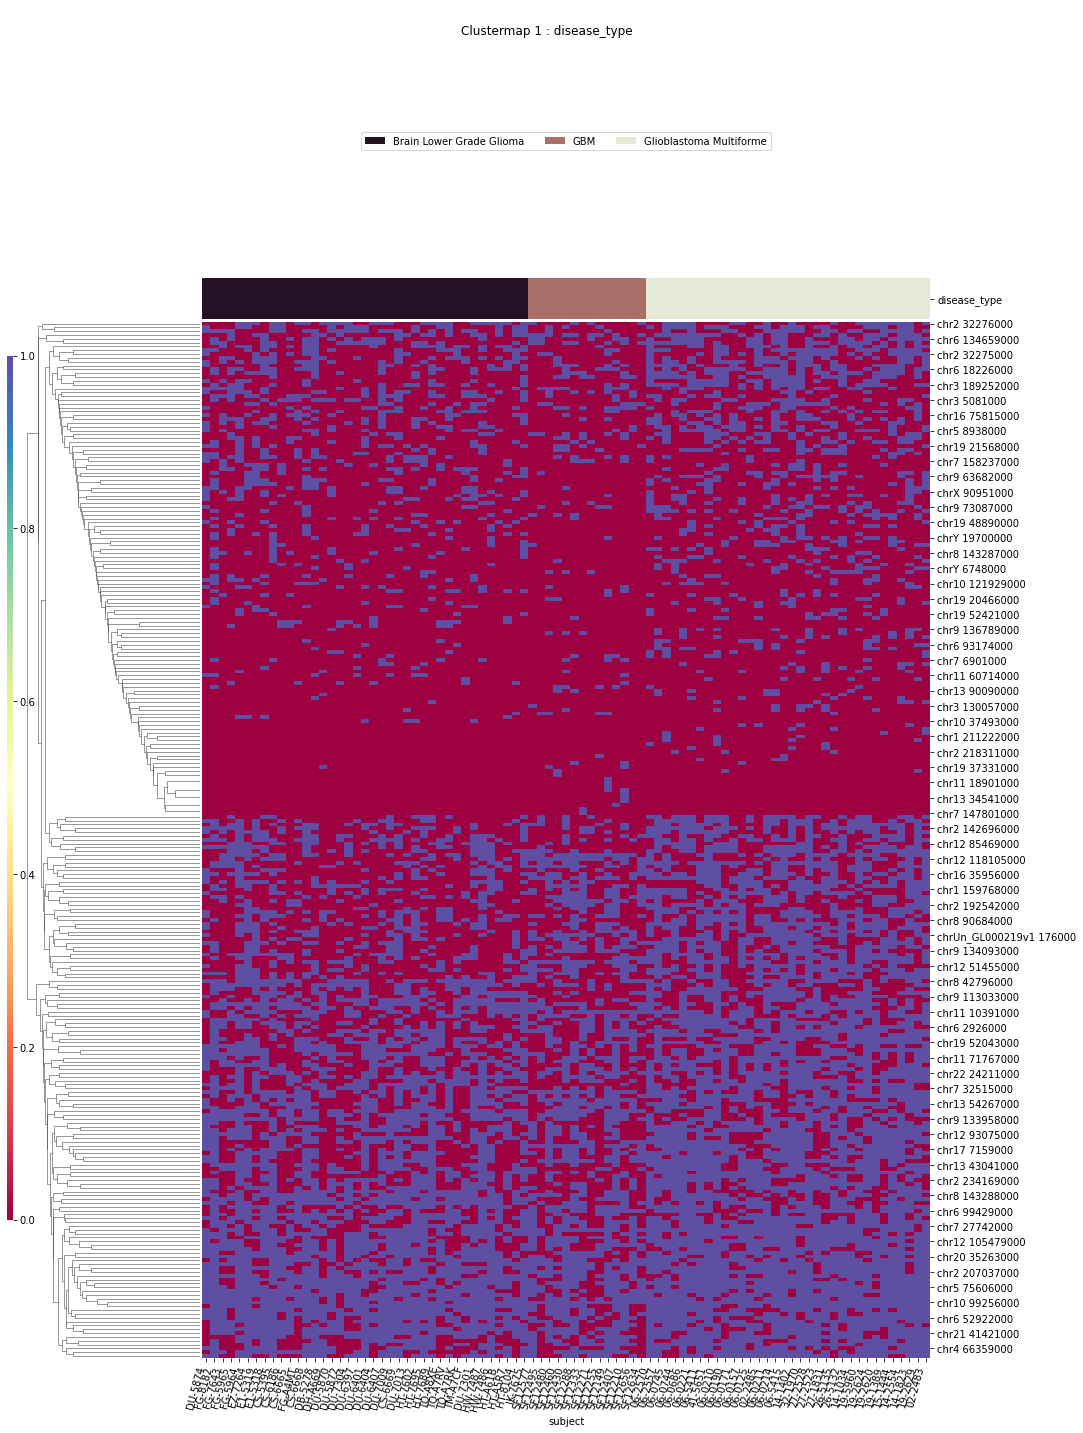

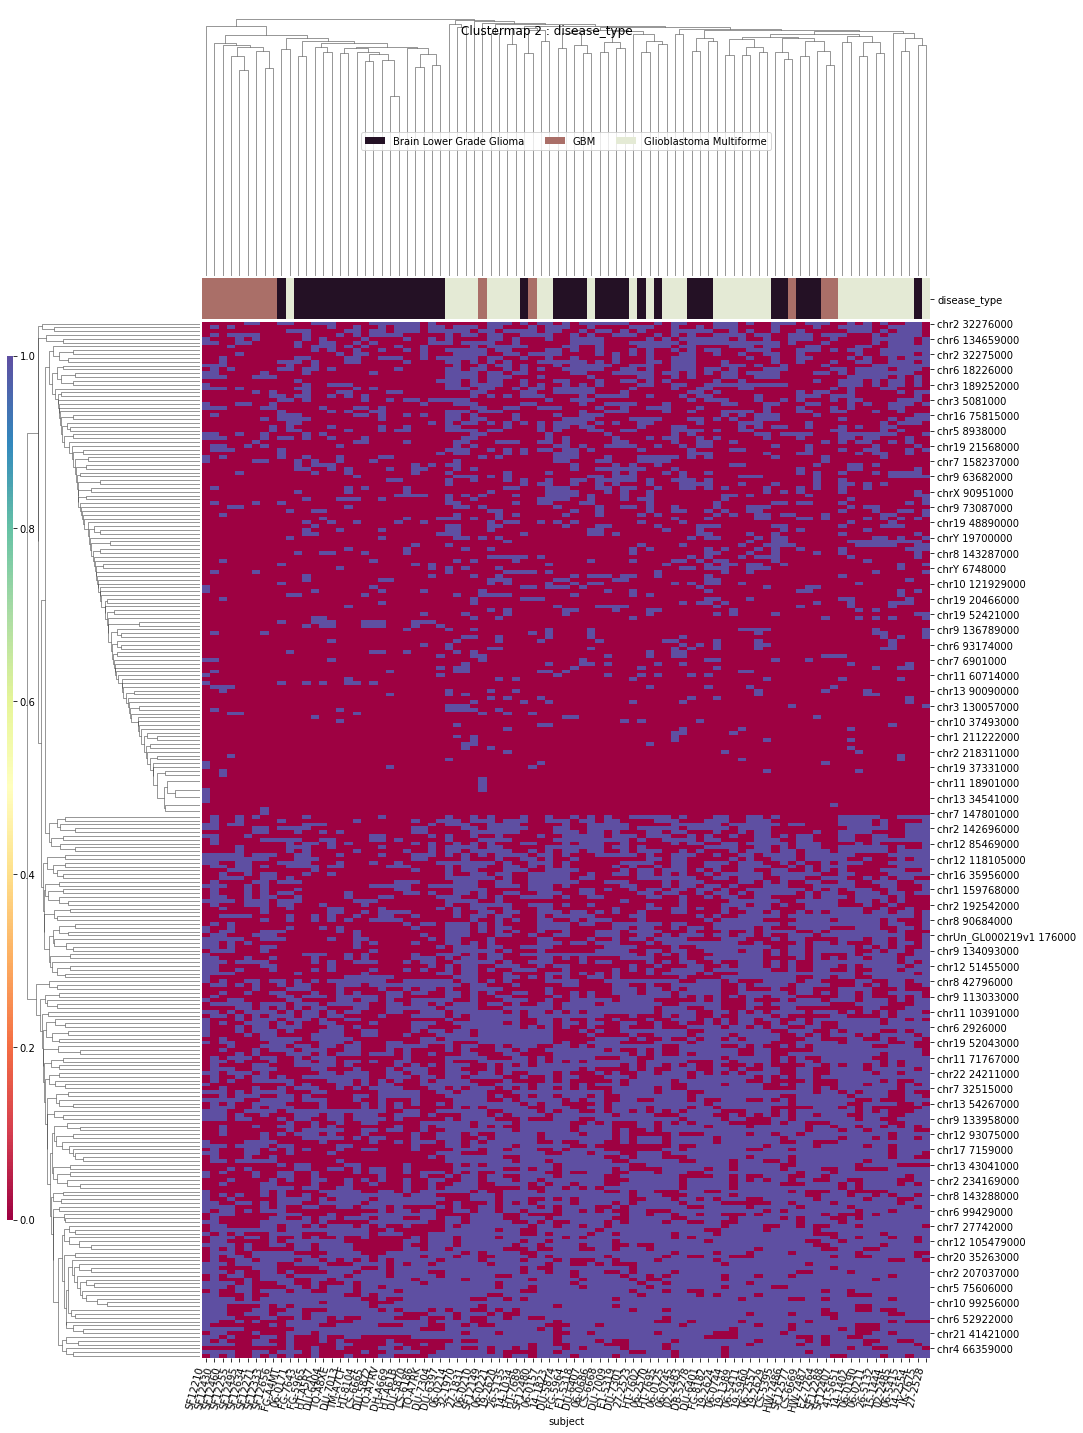

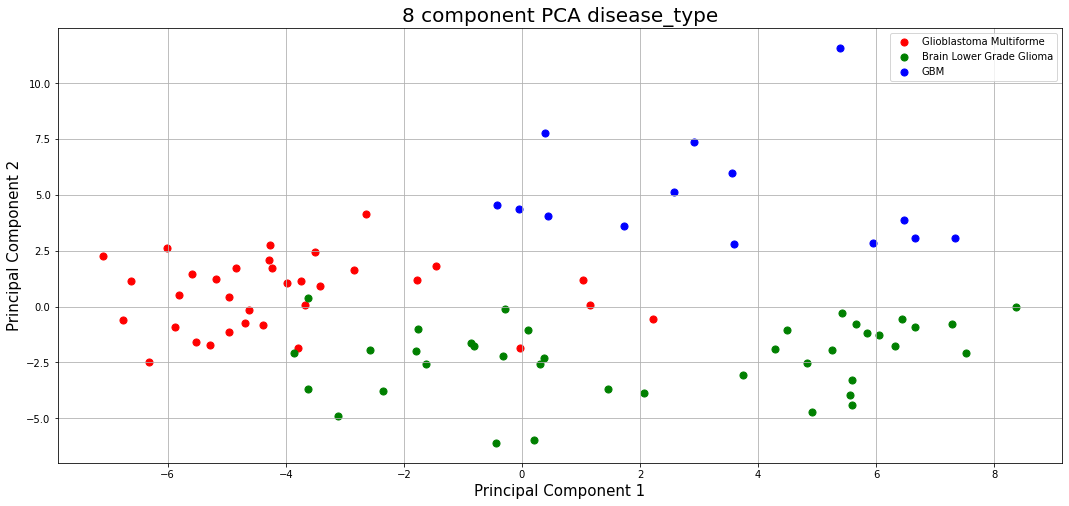

In [139]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [140]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:43:24'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 1409000' 'chr1 156182000' 'chr1 160690000' 'chr1 209141000'
 'chr1 45513000' 'chr1 52007000' 'chr1 70461000' 'chr1 75383000'
 'chr1 93276000' 'chr11 60714000' 'chr12 105479000' 'chr12 118105000'
 'chr12 123492000' 'chr12 32099000' 'chr12 32100000' 'chr12 51455000'
 'chr12 5537000' 'chr13 43041000' 'chr15 58834000' 'chr15 78222000'
 'chr16 74799000' 'chr16 75816000' 'chr17 19505000' 'chr17 54201000'
 'chr18 2000000' 'chr19 37530000' 'chr19 52873000' 'chr2 142696000'
 'chr2 192542000' 'chr2 207037000' 'chr2 228364000' 'chr2 32275000'
 'chr22 18947000' 'chr3 125890000' 'chr3 189252000' 'chr3 23545000'
 'chr3 53977000' 'chr4 135538000' 'chr4 156305000' 'chr4 66359000'
 'chr5 115346000' 'chr5 18578000' 'chr5 30486000' 'chr5 55572000'
 'chr6 111256000' 'chr6 120931000' 'chr6 159795000' 'chr6 160849000'
 'chr6 169347000' 'chr7 125222000' 'chr7 139467000' 'chr7 16198000'
 'chr7 27742000' 'chr7 30718000' 'chr7 32515000' 'chr7 4600000'
 'c

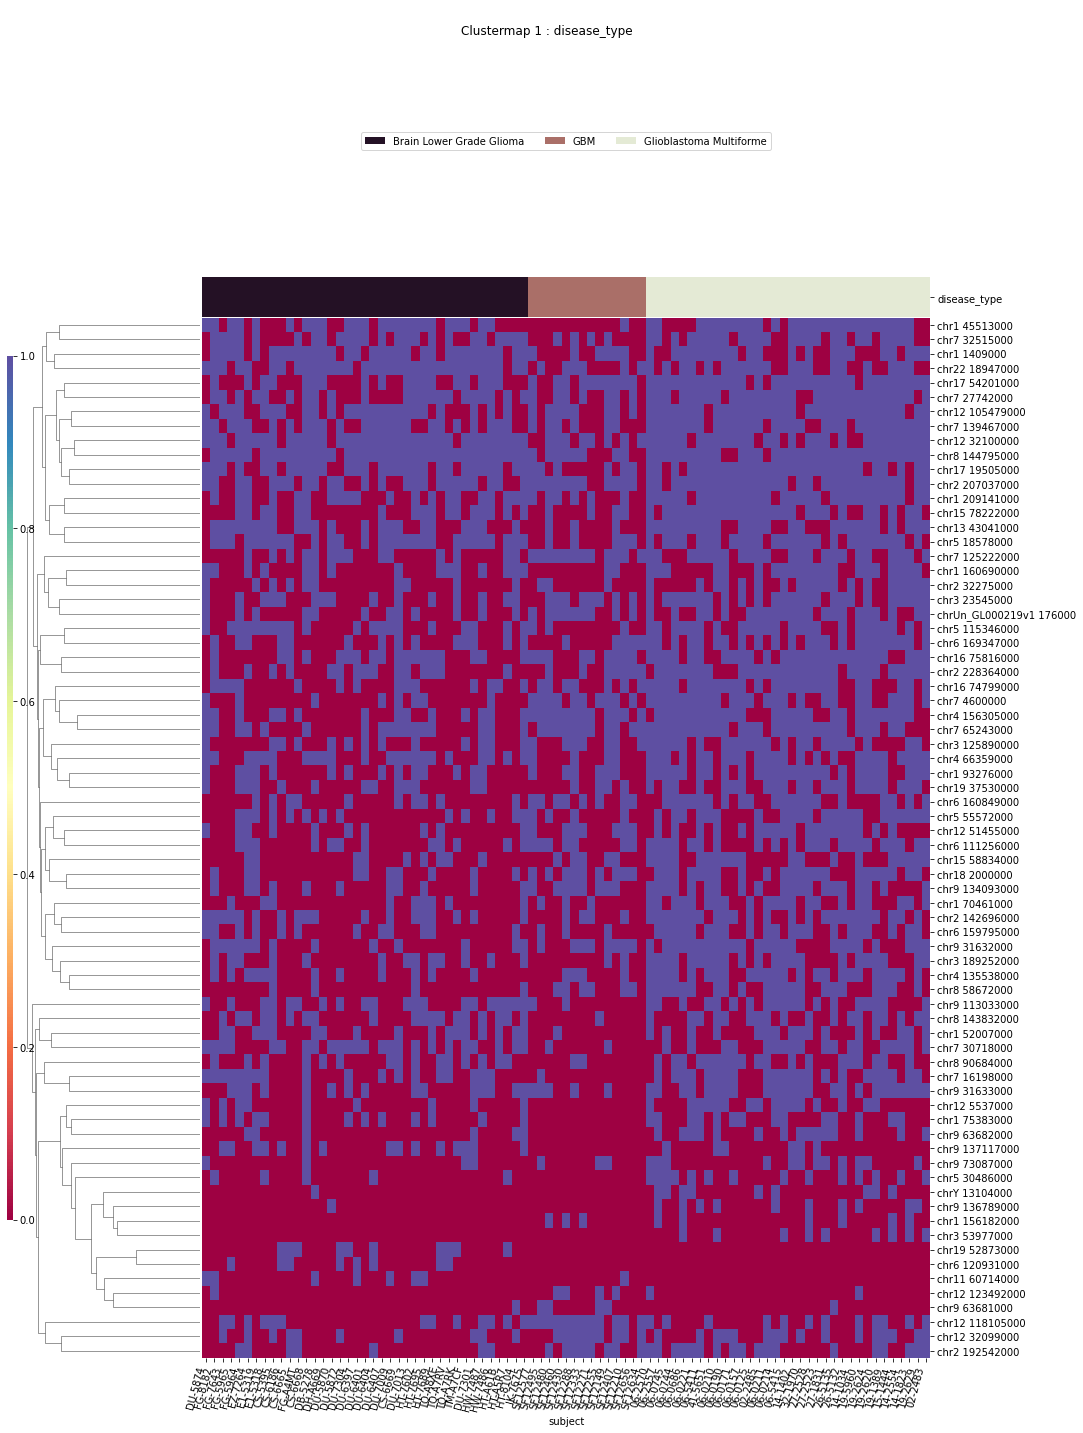

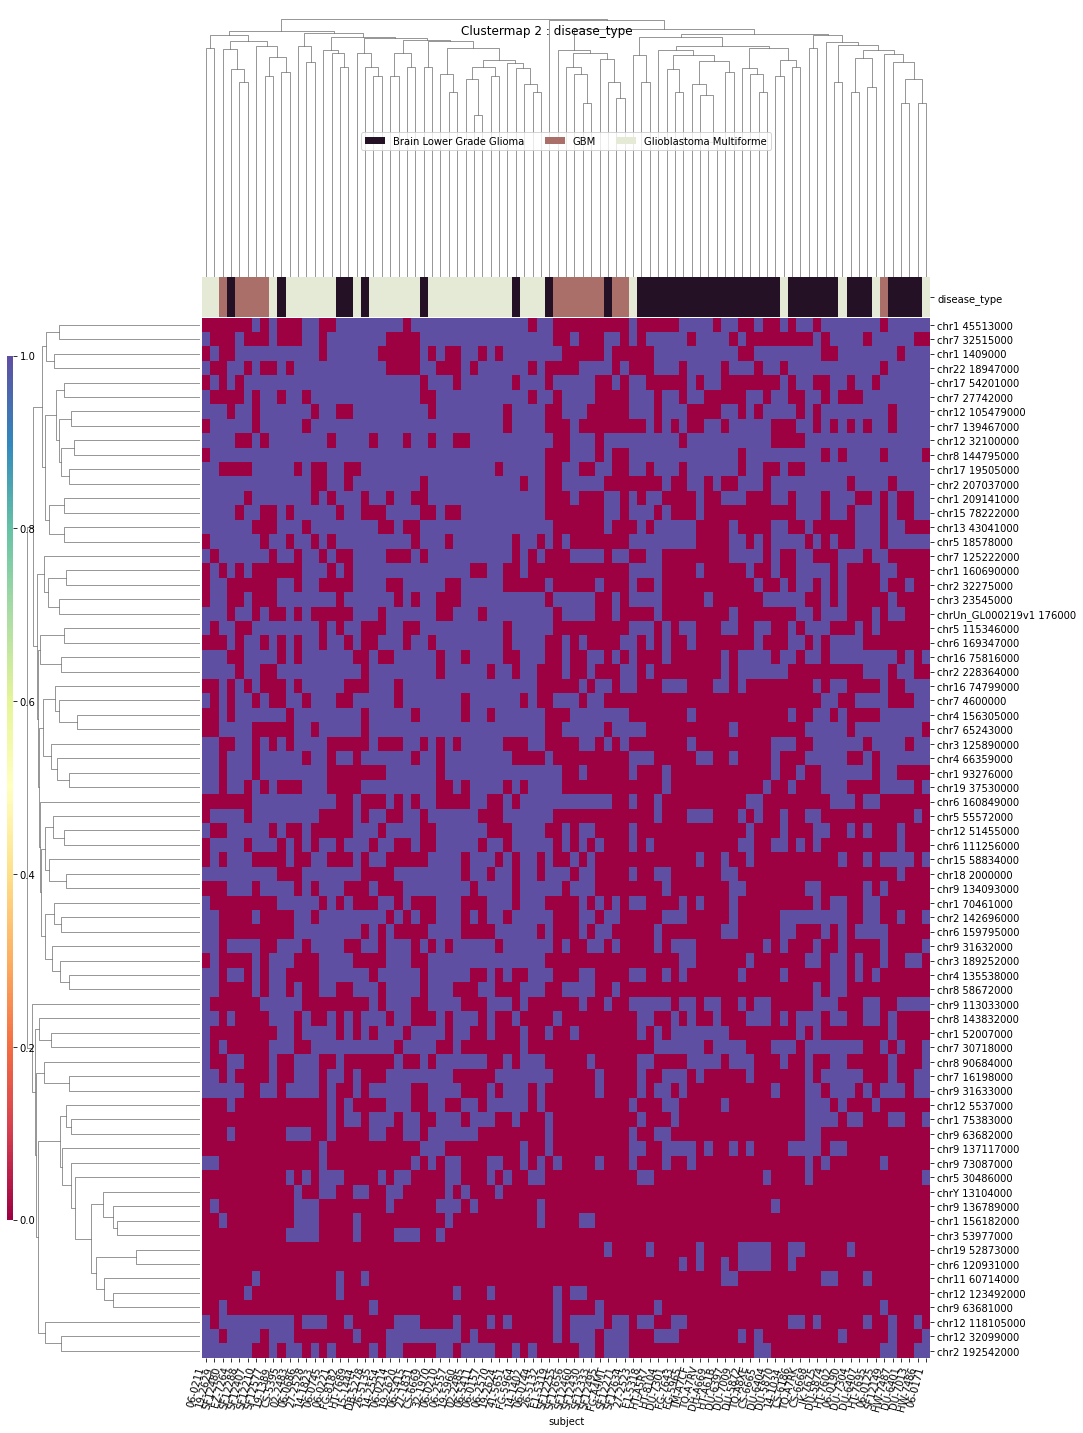

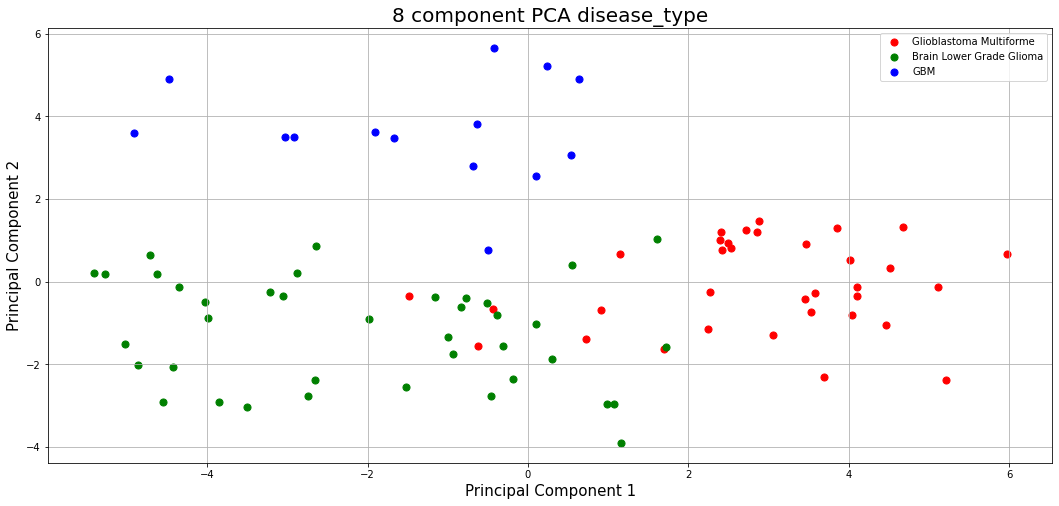

In [141]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [142]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:43:36'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 209141000' 'chr1 45513000' 'chr1 70461000' 'chr1 93276000'
 'chr12 118105000' 'chr13 43041000' 'chr17 54201000' 'chr18 2000000'
 'chr2 228364000' 'chr3 53977000' 'chr4 135538000' 'chr4 156305000'
 'chr7 125222000' 'chr7 16198000' 'chr7 4600000' 'chr8 58672000'
 'disease_type' 'subject']


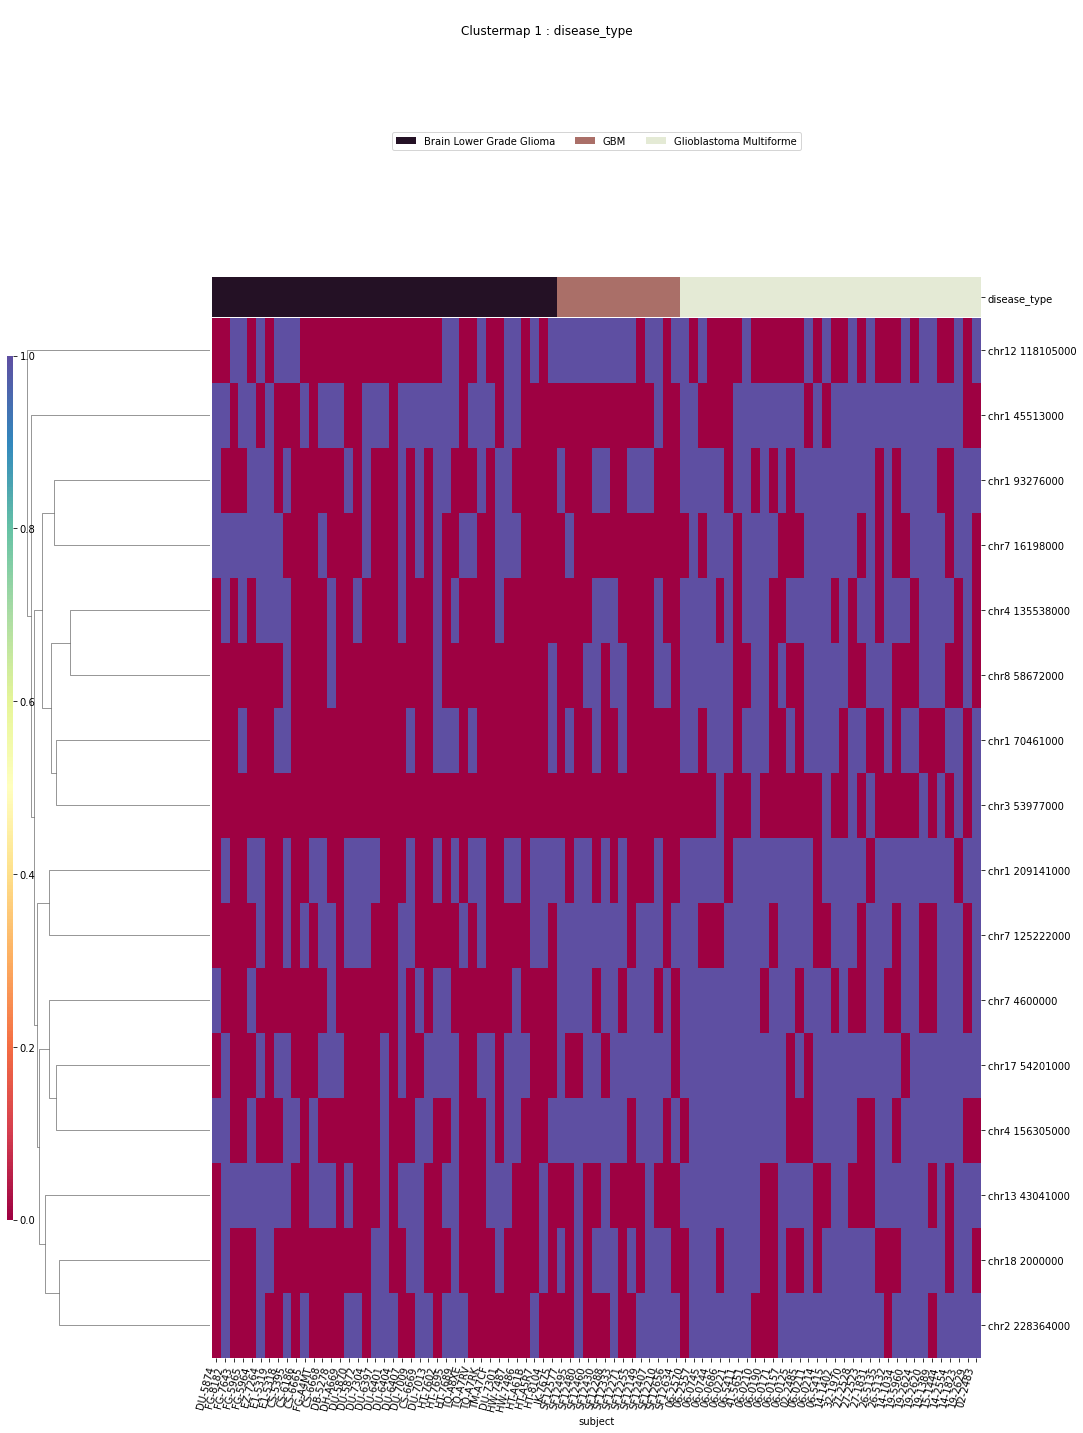

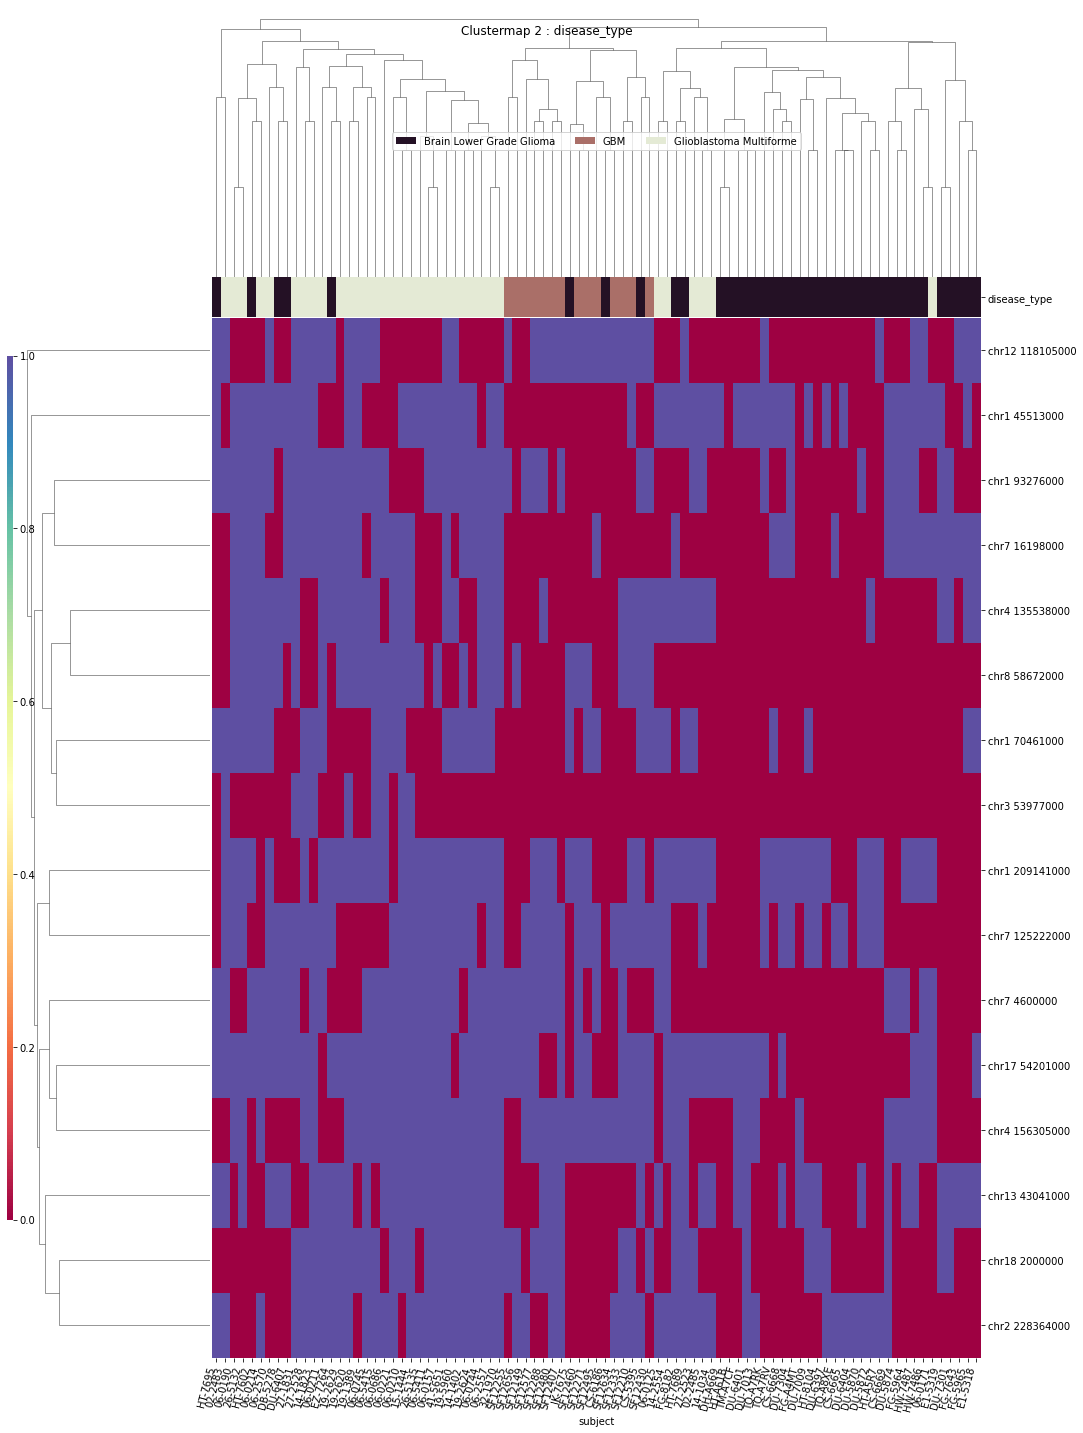

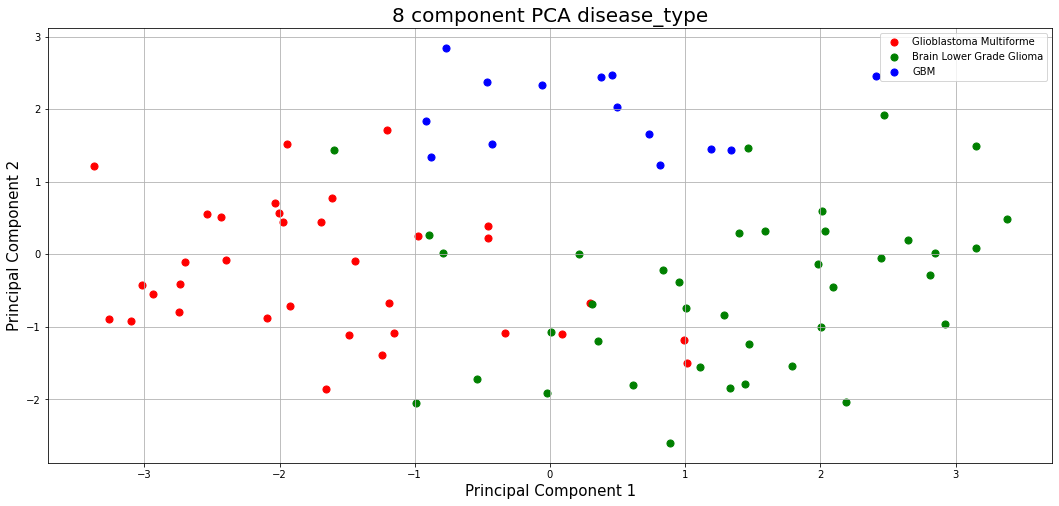

In [143]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [144]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:43:47'

---

In [145]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [146]:
pd.set_option('display.max_columns', default_max_columns)

In [147]:
pd.set_option('display.max_rows',default_max_rows)

In [148]:
pd.set_option('display.precision', default_precision)